###Problem Statement

####Retail Price Optimization

Retail price optimization is the process of setting prices for products sold by retailers to maximize their profits. The goal is to find the optimal price point that will attract customers and generate sales, while also maximizing profit margins. Retailers use various techniques to optimize their prices, such as competitor analysis, customer segmentation, and price testing. Competitor analysis involves monitoring the prices of similar products offered by competitors and adjusting prices accordingly. Customer segmentation involves dividing customers into groups based on their buying behavior and setting prices for each group accordingly. Price testing involves experimenting with different price points to determine the price that maximizes profits. It can help retailers to increase their profits and improve their competitiveness in the marketplace. It requires a deep understanding of customer behavior, market trends, and pricing strategies, as well as the ability to collect and analyze data on sales and pricing. Retailers who can successfully optimize their prices can gain a significant competitive advantage, while also providing customers with products at fair and reasonable prices.

####How are these prices optimized ?

Using several features about existing products, Regression techniques can be applied to find an optimal price. These features may include Competitor prices and ratings too, as Analyzing competitors’ pricing strategies is essential in optimizing retail prices. Monitoring and benchmarking against competitors’ prices can help identify opportunities to price competitively, either by pricing below or above the competition, depending on the retailer’s positioning and strategy. Other than that, these features also include temporal features, indicating the sales of a particular product over time, which may also require Demand Forecasting. Total prices, number of customers, quantity of a product sold, all help in finding the sweet spot for retailers where they can maximize their profits. Finally, if efficient customer data is available, they can be segmented into different groups using Clustering, making it easier to cater to a particular audience for a given product.

## Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#For full view of rows and columns.
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',50)

In [ ]:
!pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport,compare

## Exploring the data

In [ ]:
df = pd.read_csv('Retail-price-synthetic.csv')

In [ ]:
df.head(50)

product_id  product_category_name month_year  qty  total_price  \
0   furniture3        furniture_decor   1/4/2017    3       539.97   
1    consoles1         consoles_games   1/4/2017    1       349.90   
2   perfumery1              perfumery   1/8/2017    1       134.99   
3   perfumery1              perfumery   1/4/2017    1       349.90   
4      garden3           garden_tools   1/7/2018    2        95.80   
5    consoles1         consoles_games   1/6/2017    9       809.91   
6      garden9           garden_tools   1/3/2018   13       805.87   
7     garden10           garden_tools   1/9/2017   12       460.80   
8      garden8           garden_tools   1/1/2018   11      1082.00   
9      garden7           garden_tools   1/1/2018    1       110.99   
10  furniture4        furniture_decor   1/4/2018   15       974.85   
11     garden8           garden_tools   1/6/2018    8       399.20   
12    garden10           garden_tools   1/6/2018    5       249.50   
13     health9          health_beauty   1/7/2018   18       538.20   
14  furniture1        furniture_decor   1/7/2017    1        78.00   
15    health10          health_beauty  1/12/2017    6      1950.00   
16     garden7           garden_tools   1/8/2018   17      1987.40   
17  perfumery1              perfumery   1/7/2018    3        71.97   
18     garden6           garden_tools   1/6/2018    4       191.60   
19  furniture3        furniture_decor   1/7/2018   13      4290.00   
20        bed1         bed_bath_table   1/2/2018    1        99.99   
21  furniture3        furniture_decor   1/2/2017    7       599.93   
22    watches2          watches_gifts   1/1/2018    3       185.97   
23     garden3           garden_tools   1/3/2018   17       601.80   
24  perfumery1              perfumery   1/1/2018    8      1188.00   
25  furniture1        furniture_decor   1/4/2018    6       205.20   
26     health9          health_beauty   1/3/2018   11       328.90   
27     garden7           garden_tools   1/8/2018    7       973.00   
28    watches2          watches_gifts   1/5/2017   15      2715.70   
29     garden4           garden_tools   1/4/2018   21      6930.00   
30  furniture1        furniture_decor   1/9/2017   21      1889.79   
31     health5          health_beauty   1/3/2018   12      1198.80   
32     health7          health_beauty   1/4/2018   20      1078.00   
33  furniture3        furniture_decor   1/4/2017    9       584.91   
34  furniture4        furniture_decor   1/2/2018    2       202.00   
35  furniture3        furniture_decor   1/5/2017    1        59.90   
36       cool2             cool_stuff   1/2/2018    1        99.99   
37     health7          health_beauty   1/2/2017    4      1399.60   
38  computers1  computers_accessories   1/3/2018   17       601.80   
39    watches6          watches_gifts   1/4/2017   13       259.87   
40    watches6          watches_gifts   1/6/2018   10       789.00   
41  furniture1        furniture_decor   1/4/2018    2        99.98   
42    watches2          watches_gifts   1/6/2018   10       999.00   
43     health8          health_beauty  1/10/2017   17      2629.83   
44    watches3          watches_gifts  1/12/2017    1        98.90   
45  computers2  computers_accessories   1/4/2018    7       245.40   
46    watches4          watches_gifts   1/6/2017   14      1399.86   
47    watches1          watches_gifts   1/5/2017   18      1799.82   
48     health5          health_beauty   1/1/2018   39      1946.10   
49     health4          health_beauty   1/4/2018   11       648.89   

    freight_price  unit_price  product_name_lenght  \
0       17.950000       38.40                   49   
1       13.645357       24.50                   49   
2       12.215000       56.99                   54   
3       13.665000       56.99                   54   
4       15.978000       59.90                   59   
5       16.133333       36.20                   49   
6       17.517500       49.90                   58   
7

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  5000 non-null   object 
 1   product_category_name       5000 non-null   object 
 2   month_year                  5000 non-null   object 
 3   qty                         5000 non-null   int64  
 4   total_price                 5000 non-null   float64
 5   freight_price               5000 non-null   float64
 6   unit_price                  5000 non-null   float64
 7   product_name_lenght         5000 non-null   int64  
 8   product_description_lenght  5000 non-null   int64  
 9   product_photos_qty          5000 non-null   int64  
 10  product_weight_g            5000 non-null   int64  
 11  product_score               5000 non-null   float64
 12  customers                   5000 non-null   int64  
 13  weekday                     5000 

product_id: Identifier for each unique product.

product_category_name: Category to which each product belongs (e.g., bed_bath_table).

month_year: Month and year of the transaction.

qty: Quantity of the product sold in that month.

total_price: Total sales price of the product for the given quantity.

freight_price: Freight or shipping cost for the product.

unit_price: Price per unit of the product.

product_name_lenght: Length of the product name.

product_description_lenght: Length of the product description.

product_photos_qty: Number of photos available for the product.

product_weight_g: Weight of the product in grams.

product_score: Product rating or score (likely from customer feedback).

customers: Number of customers for the given product in that month.

weekday: Indicates if the transaction took place on a weekday.

weekend: Indicates if the transaction took place on a weekend.

holiday: Indicates if the transaction happened on a holiday.

month: Month of the transaction (extracted from month_year).

year: Year of the transaction (extracted from month_year).

s: Likely a stock or sales-related metric (specifics may require further clarification).

volume: Volume of the product (possibly in cubic centimeters or liters).

comp_1, comp_2, comp_3: Comparison metrics or competitor prices (specific context may vary).

ps1, ps2, ps3: Additional comparison scores or metrics (associated with the comp columns).

fp1, fp2, fp3: Freight prices or fees related to competitor metrics.

lag_price: Previous period's price (possibly last month's price for the product).

In [ ]:
df.shape

(5000, 30)

In [ ]:
df.describe().T

count          mean          std          min  \
qty                         5000.0     14.039200    15.037330     1.000000   
total_price                 5000.0   1353.018348  1672.549380    19.900000   
freight_price               5000.0     19.989119     9.997406     0.000000   
unit_price                  5000.0     99.343867    69.777510    19.900000   
product_name_lenght         5000.0     48.325200     9.576188    29.000000   
product_description_lenght  5000.0    741.431600   623.383414   100.000000   
product_photos_qty          5000.0      2.039800     1.349733     1.000000   
product_weight_g            5000.0   1768.359200  2188.778912   100.000000   
product_score               5000.0      4.073240     0.232213     3.300000   
customers                   5000.0     78.540200    56.683093     1.000000   
weekday                     5000.0     21.774400     0.993631    20.000000   
weekend                     5000.0      8.691800     0.714503     8.000000   
holiday                     5000.0      1.430400     0.855162     0.000000   
month                       5000.0      6.246600     3.160029     1.000000   
year                        5000.0   2017.523400     0.499502  2017.000000   
s                           5000.0     14.174150    11.783138     0.484262   
volume                      5000.0  10141.400000  8533.785267   640.000000   
comp_1                      5000.0     75.641544    45.218400    19.900000   
ps1                         5000.0      4.157180     0.122798     3.700000   
fp1                         5000.0     17.439741     8.325181     0.095439   
comp_2                      5000.0     88.112236    46.135199    19.900000   
ps2                         5000.0      4.095960     0.215845     3.300000   
fp2                         5000.0     17.840577     5.634474     4.410000   
comp_3                      5000.0     80.412232    46.403684    19.900000   
ps3                         5000.0      4.000300     0.221024     3.500000   
fp3                         5000.0     17.245118     4.735184     7.670000   
lag_price                   5000.0    100.595451    70.426169    19.850000   

                                    25%          50%           75%       max  
qty                            5.000000    10.000000     18.000000    122.00  
total_price                  324.950000   769.450000   1777.500000  12095.00  
freight_price                 14.351000    17.154375     22.080000     75.00  
unit_price                    53.766667    84.724293    119.990000    364.00  
product_name_lenght           40.000000    50.000000     58.000000     60.00  
product_description_lenght   340.000000   501.000000    897.000000   3006.00  
product_photos_qty             1.000000     2.000000      3.000000      8.00  
product_weight_g             350.000000   950.000000   1800.000000   9750.00  
product_score                  3.900000     4.100000      4.200000      4.50  
customers                     34.000000    62.000000    115.000000    339.00  
weekday                       21.000000    22.000000     23.000000     23.00  
weekend                        8.000000     9.000000      9.000000     10.00  
holiday                        1.000000     1.000000      2.000000      4.00  
month                          4.000000     6.000000      8.000000     12.00  
year                        2017.000000  2018.000000   2018.000000   2018.00  
s                              7.142857    10.801282     17.620076    100.00  
volume                      3762.000000  8000.000000  15000.000000  32736.00  
comp_1                        49.900000    69.900000     99.990000    349.90  
ps1                            4.100000     4.200000      4.200000      4.50  
fp1                           13.645357    16.529091     19.206667     57.23  
comp_2                        53.709524    79.990000    108.000000    349.90  
ps2                            4.100000     4.200000      4.200000      4.40  
fp2                        

## EDA

In [ ]:
Report = ProfileReport(df)

In [ ]:
df.describe(include='object').T

count unique           top freq
product_id              676     52       health5   20
product_category_name   676      9  garden_tools  160
month_year              676     20    01-03-2018   50

In [ ]:
!pip install -U klib

In [ ]:
import klib

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


<Axes: xlabel='lag_price', ylabel='Density'>

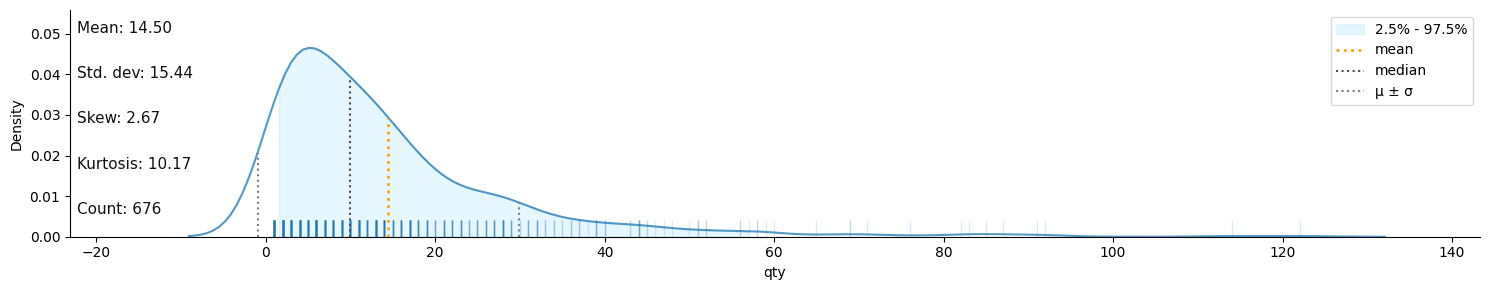

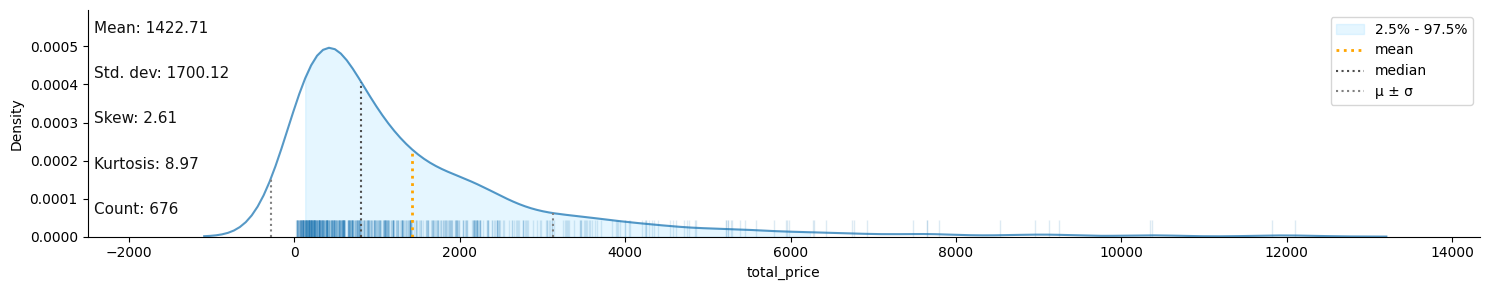

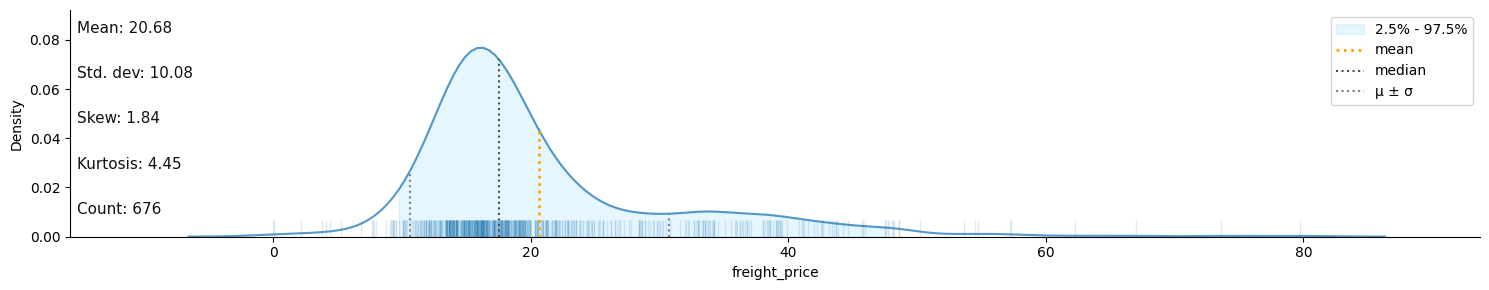

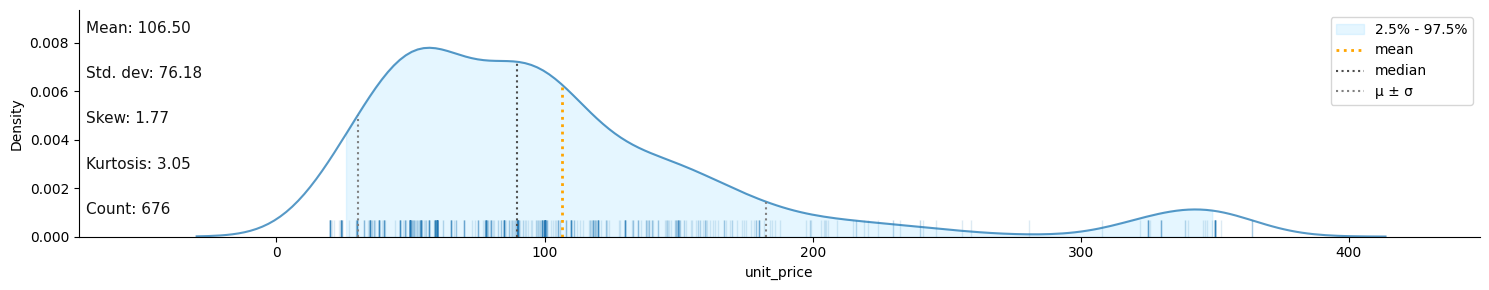

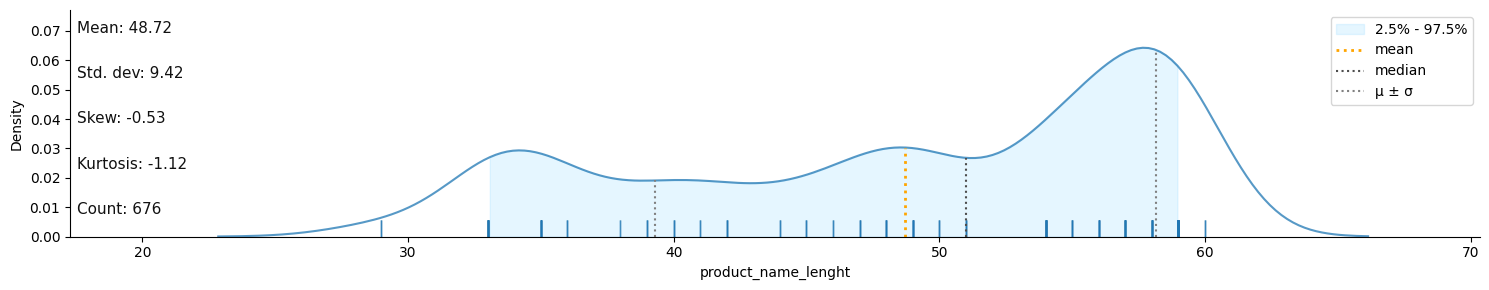

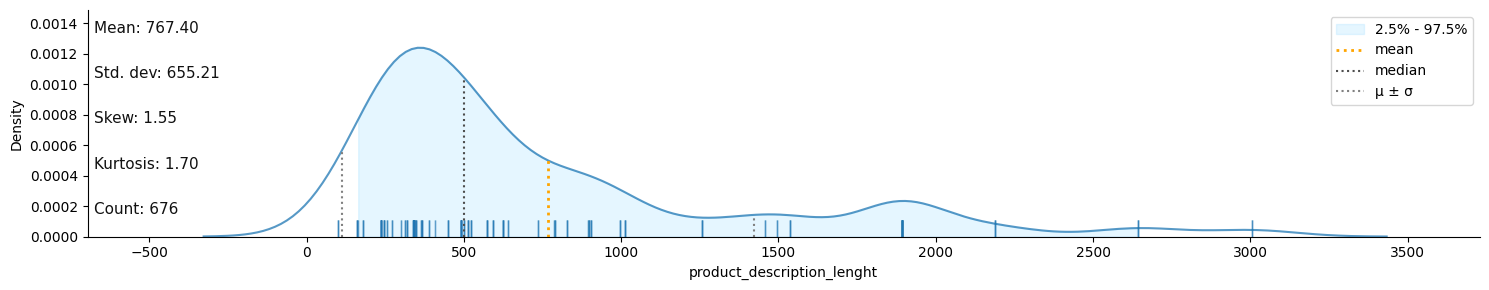

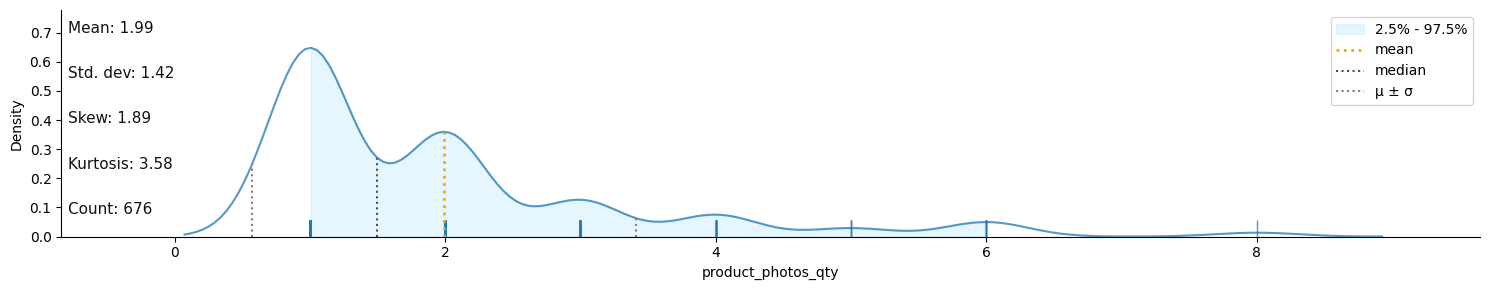

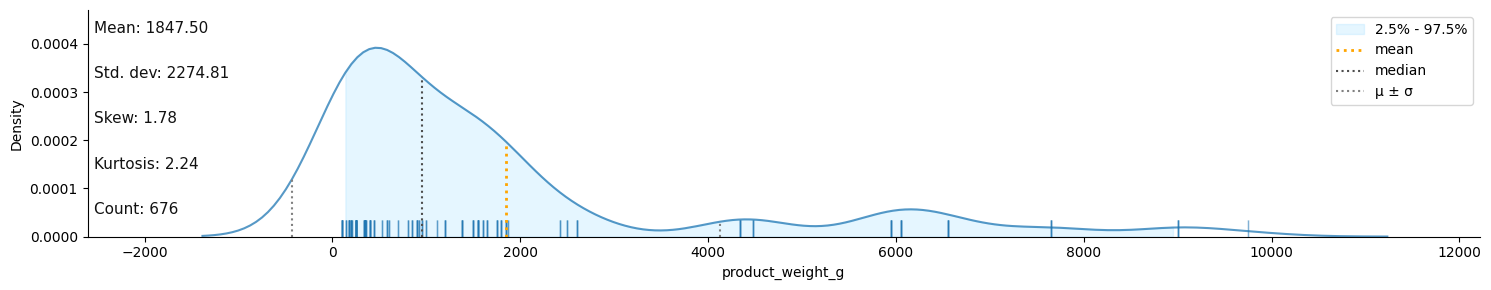

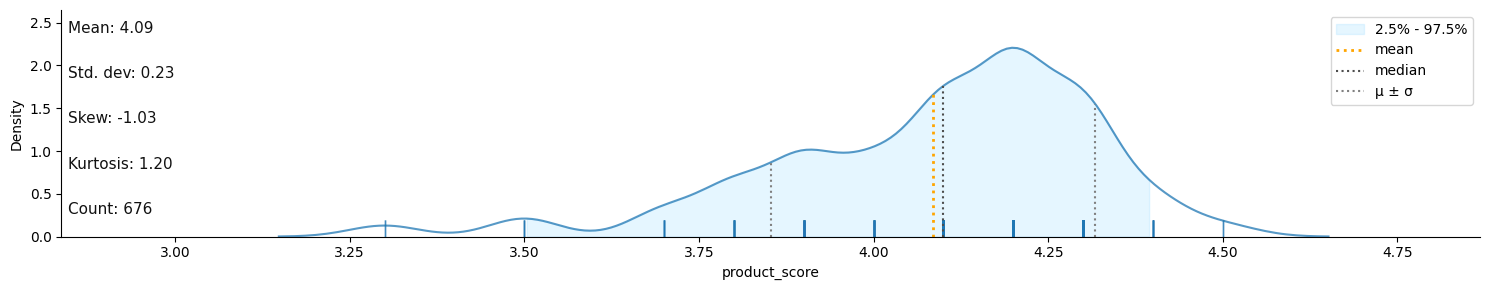

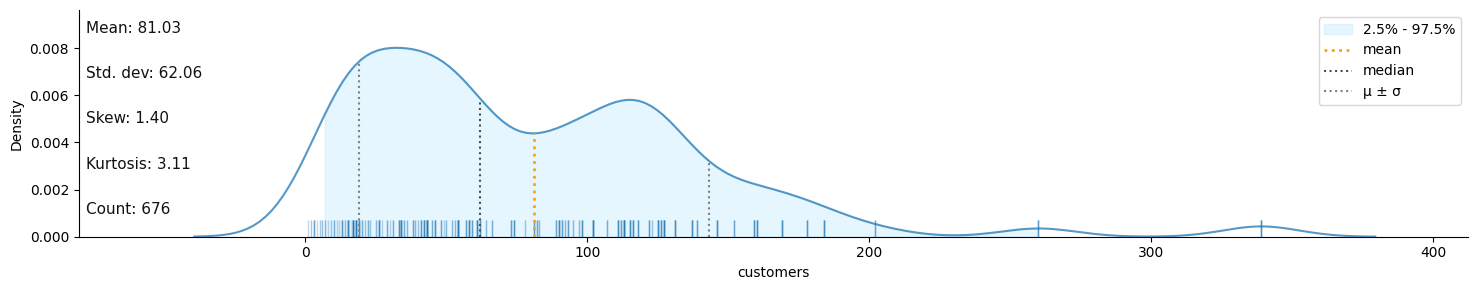

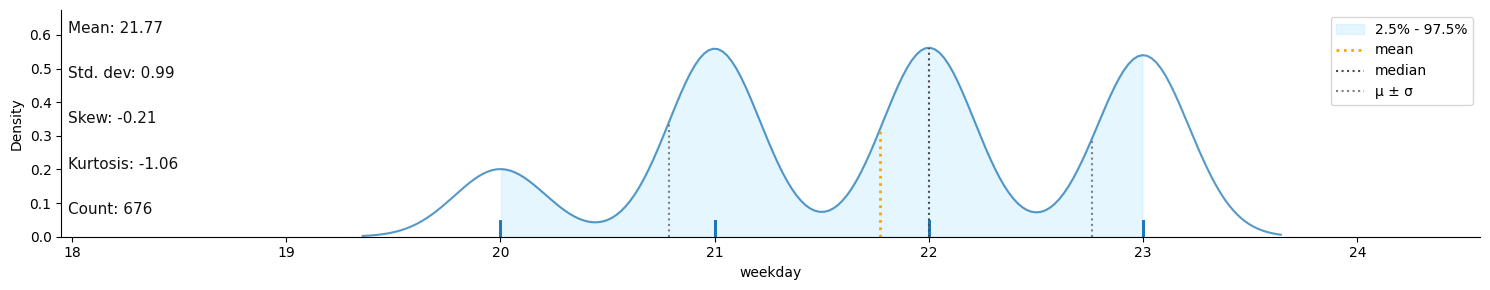

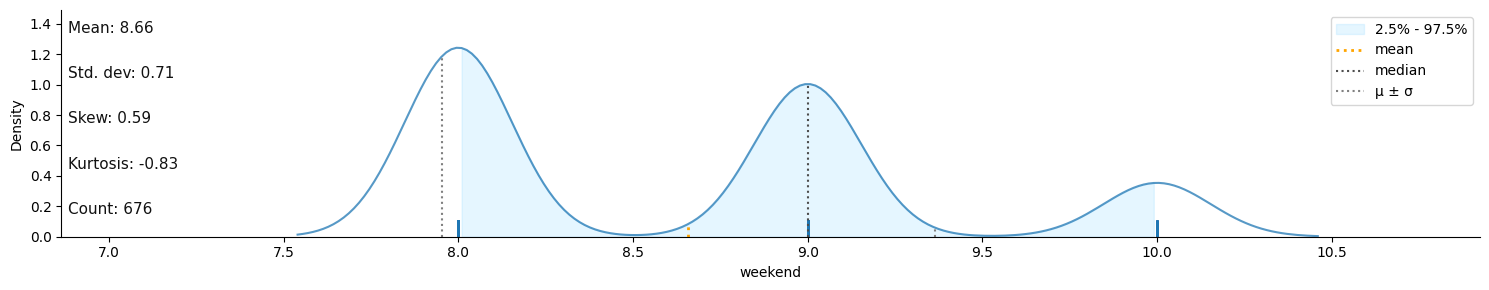

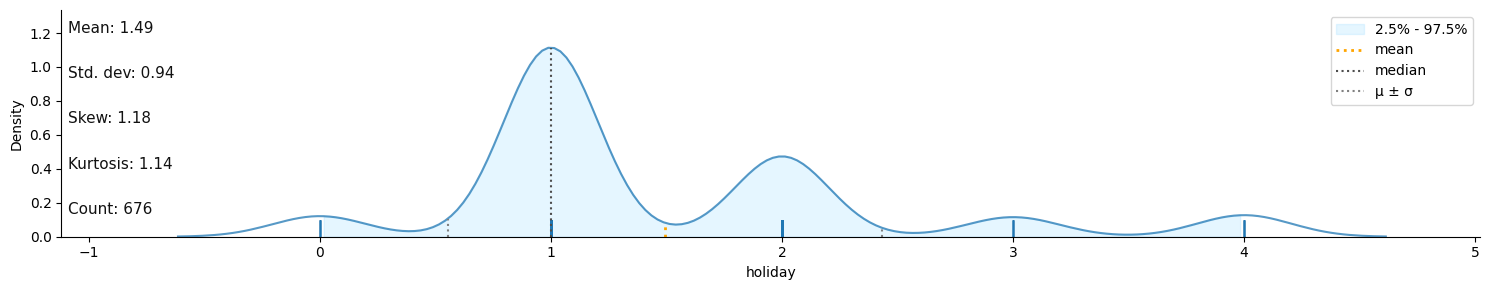

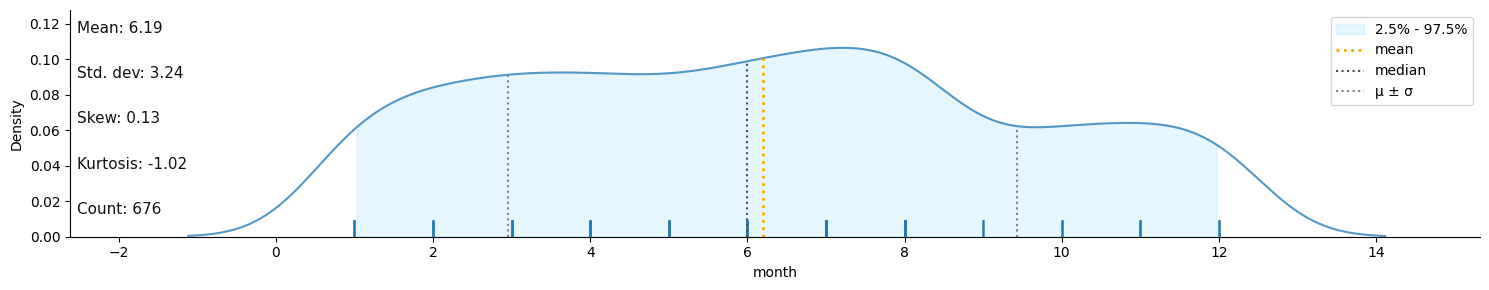

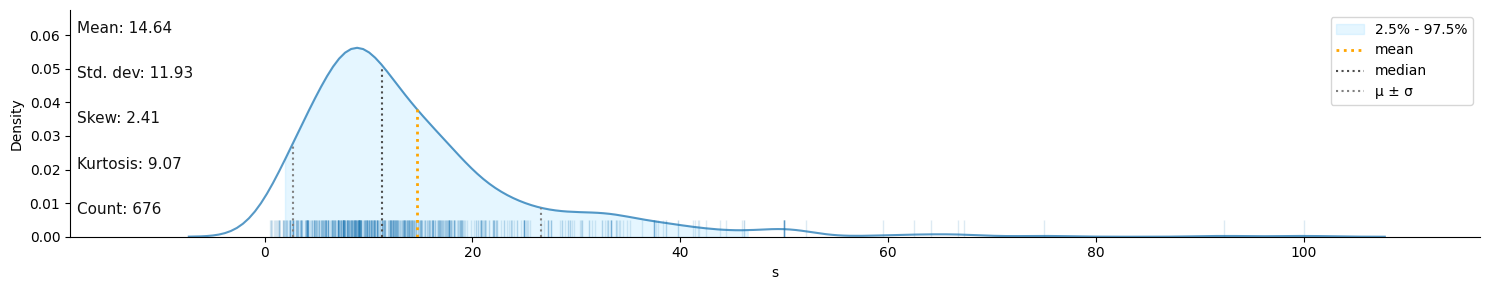

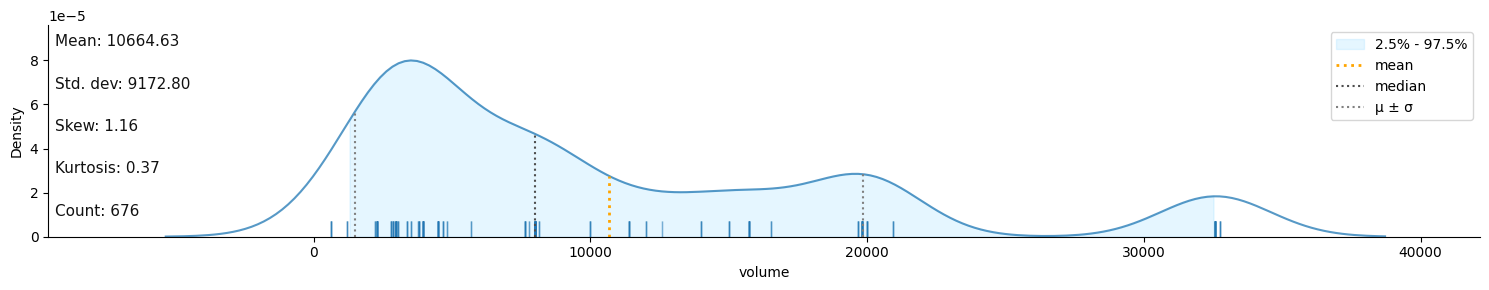

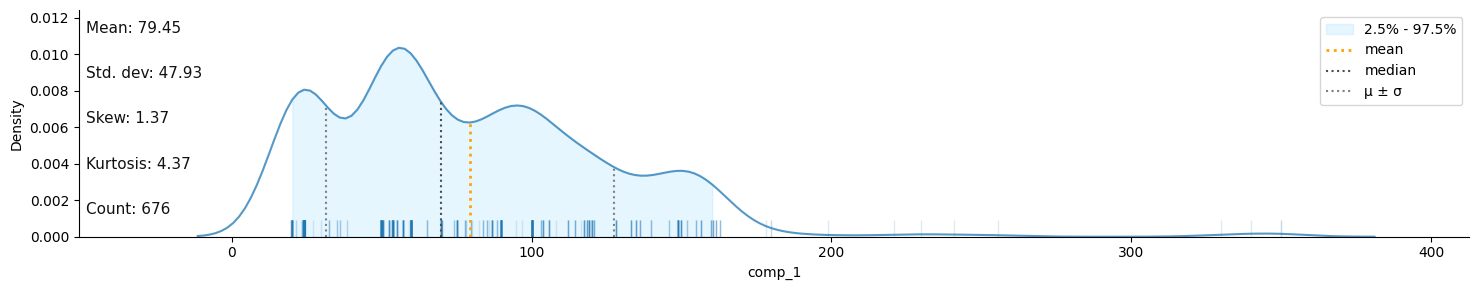

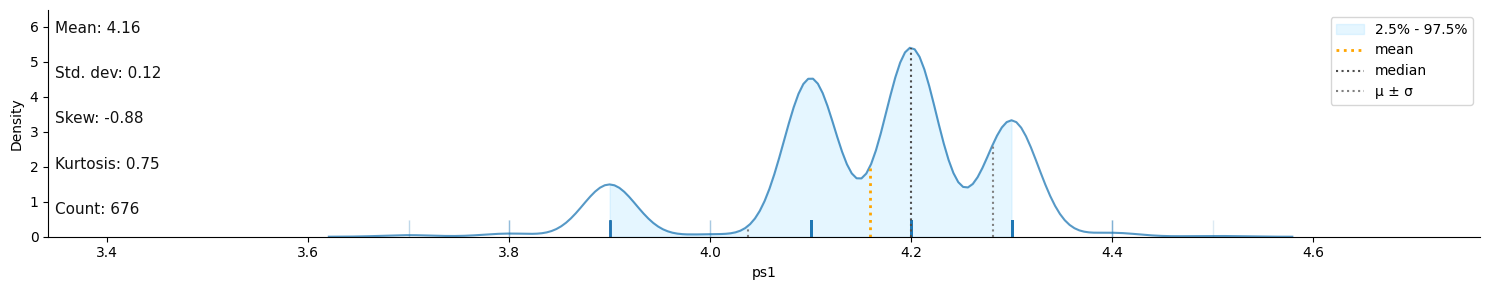

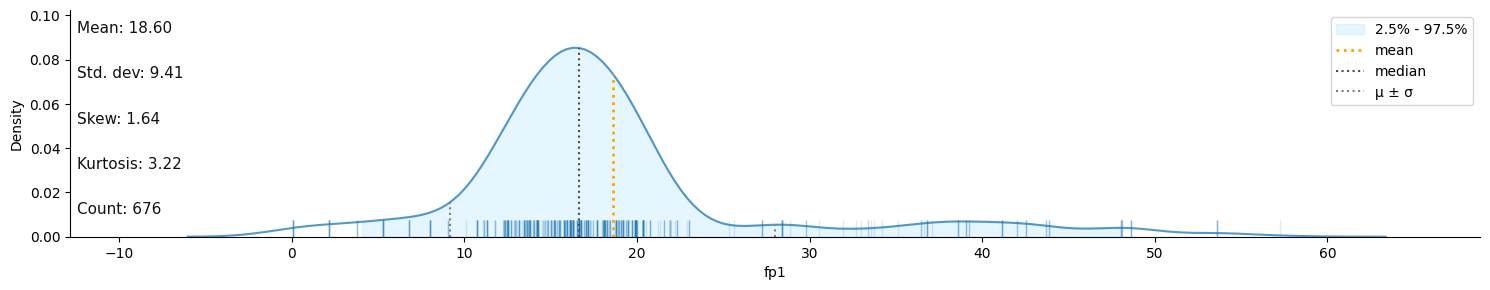

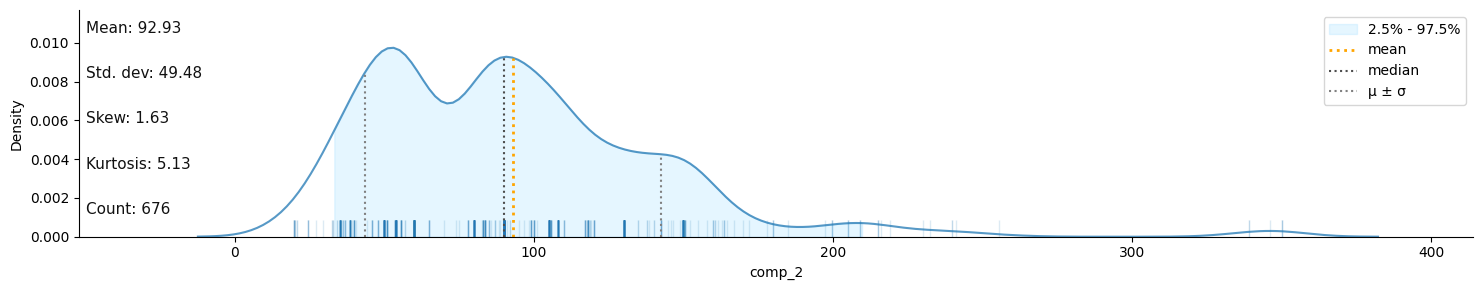

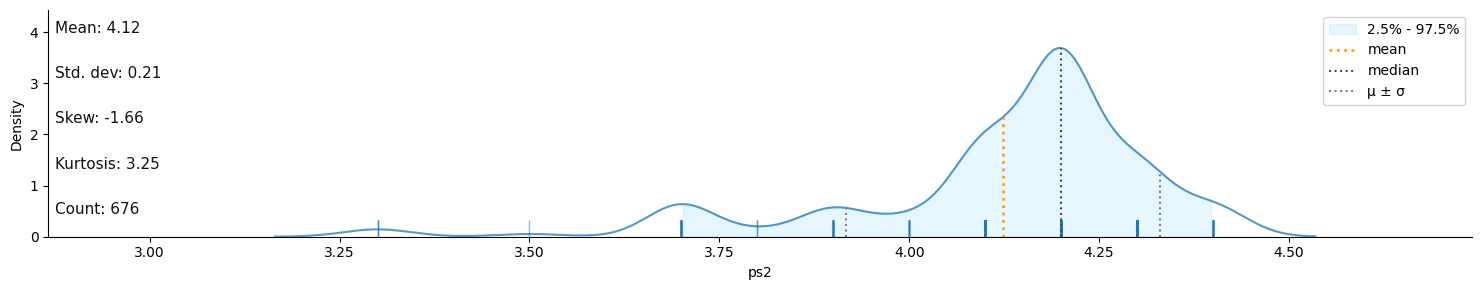

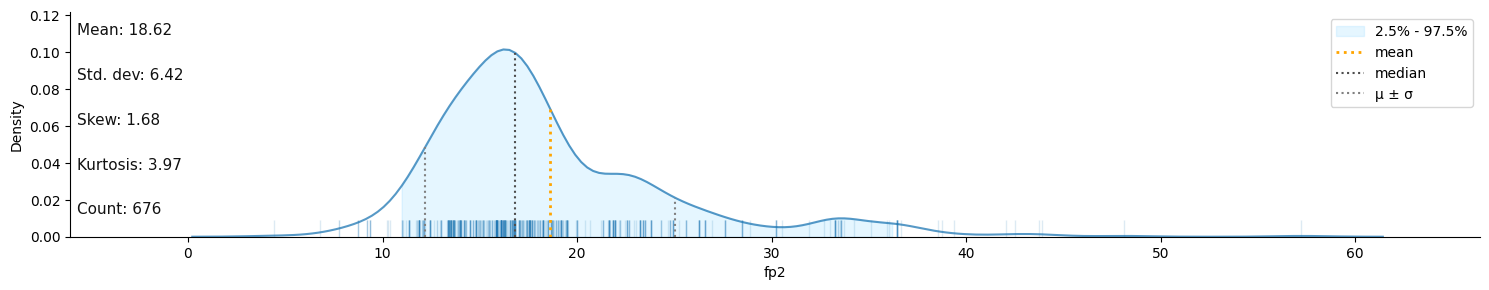

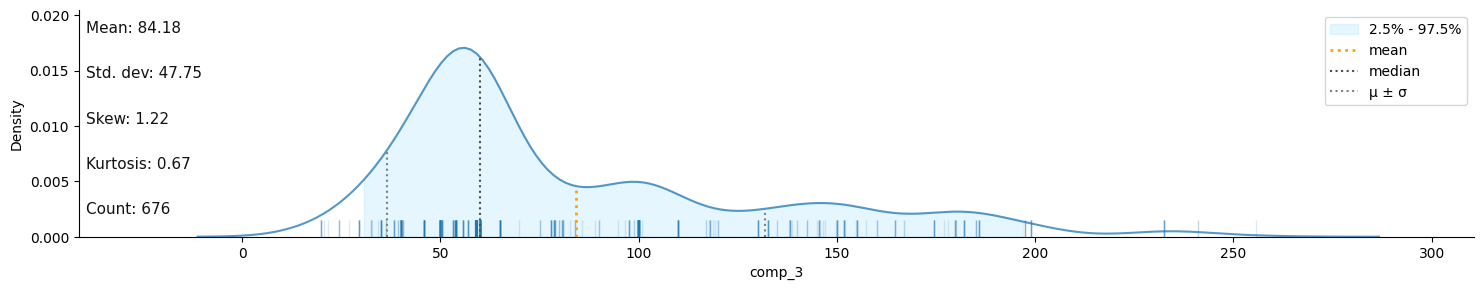

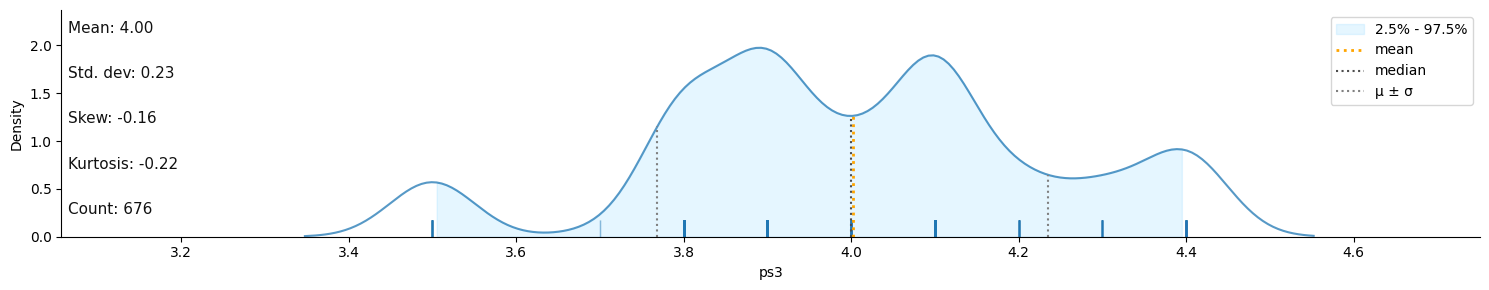

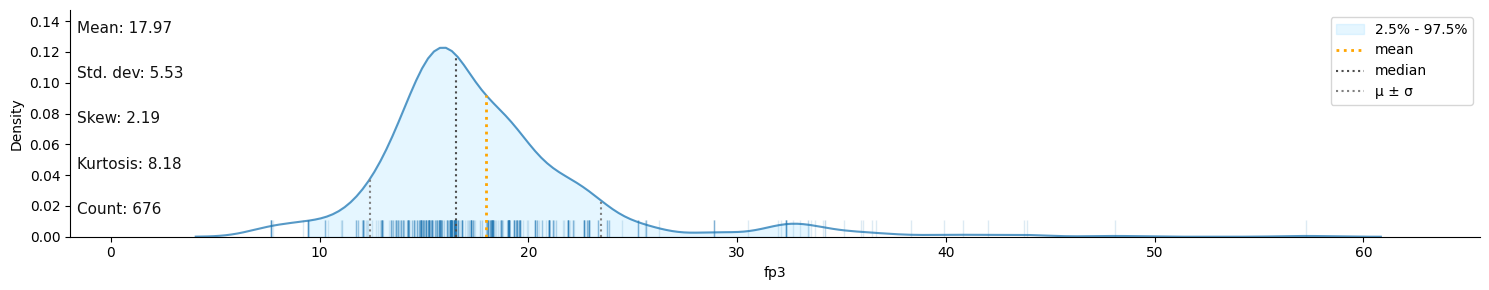

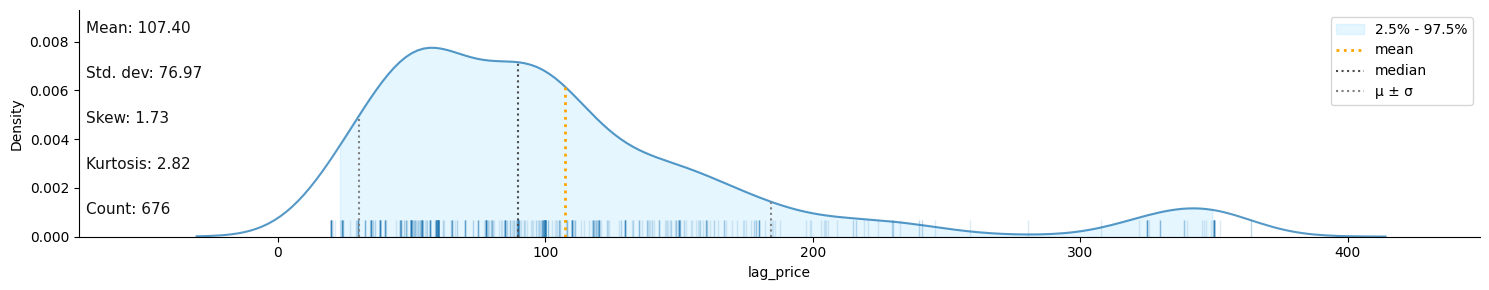

In [ ]:
klib.dist_plot(df.select_dtypes(include='number'),showall=True)

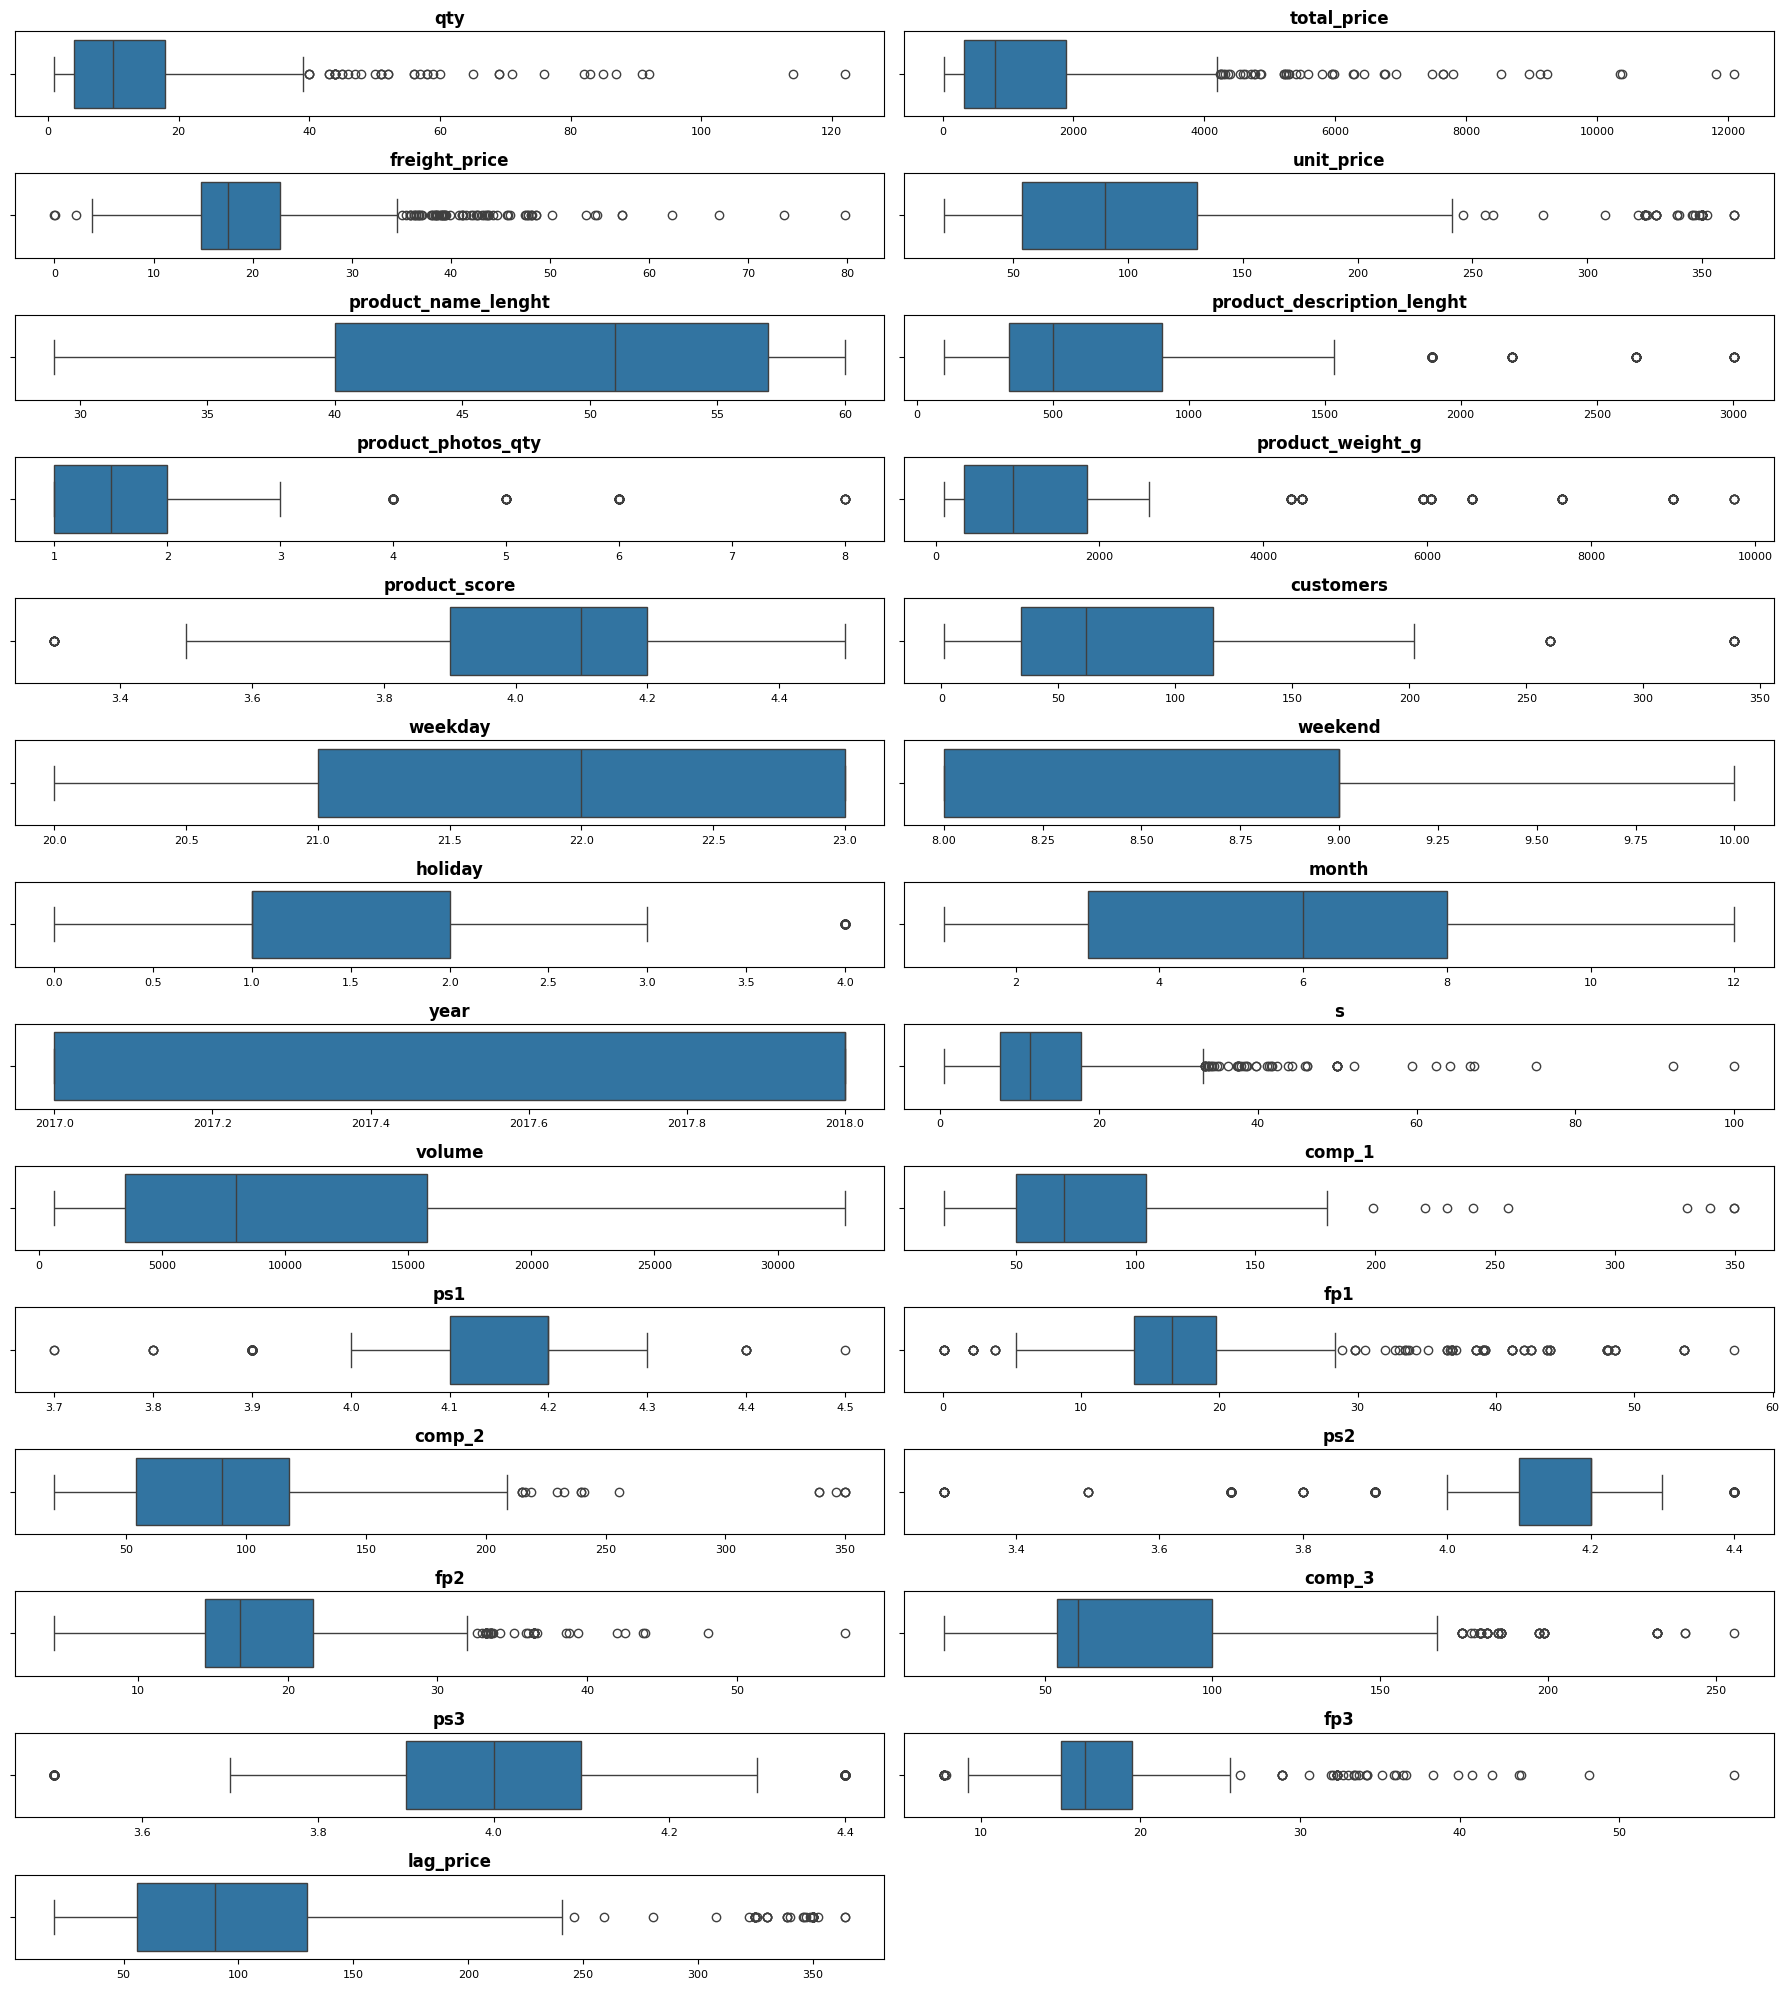

In [ ]:
# Select only numerical columns
list_num_col = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Set up subplots to fit all numerical columns in 2 columns
fig, axs = plt.subplots(len(list_num_col) // 2 + len(list_num_col) % 2, 2, figsize=(18, 20))
count = 0

# Plot each numerical column as a boxplot
for i in range(len(list_num_col) // 2 + len(list_num_col) % 2):
    for j in range(2):
        if count >= len(list_num_col):
            axs[i, j].axis('off')  # Turn off any extra subplots if columns are odd in number
            continue

        sns.boxplot(data=df, x=list_num_col[count], ax=axs[i, j], orient='h')

        axs[i, j].tick_params(axis='x', labelsize=8)
        axs[i, j].tick_params(axis='y', labelsize=8)

        axs[i, j].set_xlabel('')
        axs[i, j].set_ylabel('')
        axs[i, j].set_title(list_num_col[count], fontweight='bold')

        count += 1

plt.tight_layout()
plt.show()

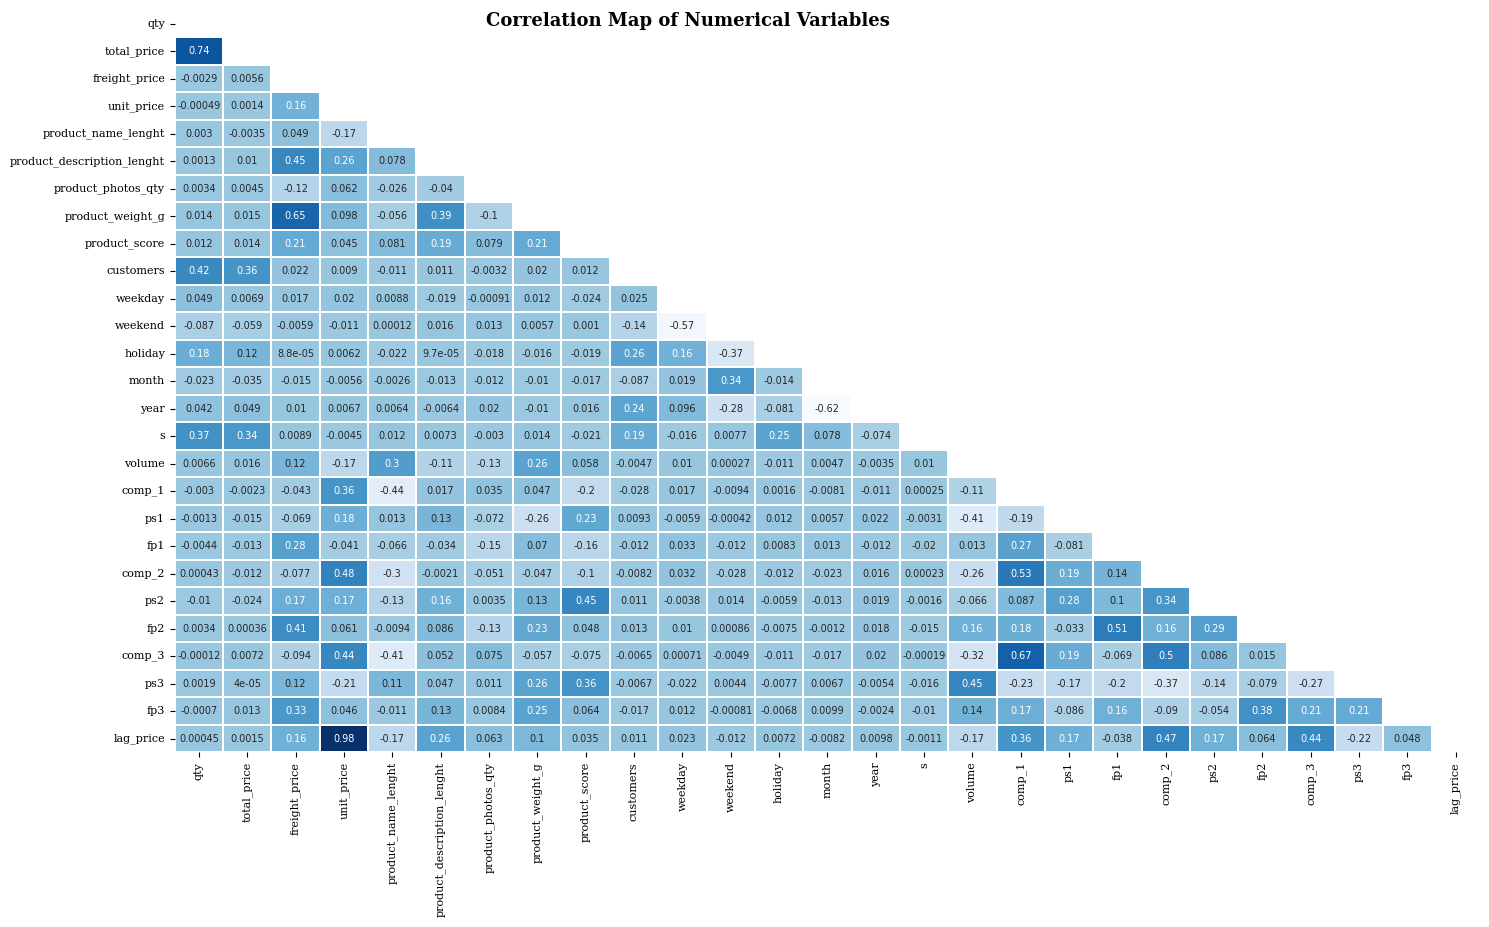

In [ ]:
# -- Create Figure -- #
fig, ax = plt.subplots(figsize=(15,10))

# --- Create Correlation --- #
corr = df[df.select_dtypes(exclude='object').columns].corr()

# --- Create Mask --- #
mask = np.triu(np.ones_like(corr, dtype=bool))

# --- Cretea heatmap --- #
sns.heatmap(corr, annot=True, mask=mask, cmap='Blues', linewidths=0.1, cbar=False, annot_kws={"size":7})

# --- Figuration Setting --- #
yticks, ylabels = plt.yticks()
xticks, xlabels = plt.xticks()
ax.set_xticklabels(xlabels, size=8, fontfamily='serif')
ax.set_yticklabels(ylabels, size=8, fontfamily='serif')
plt.suptitle('Correlation Map of Numerical Variables', fontweight='heavy', x=0.327, y=0.96, ha='left', fontsize=13, fontfamily='serif')
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

<ipython-input-43-1fb1ddefbf99>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 6))


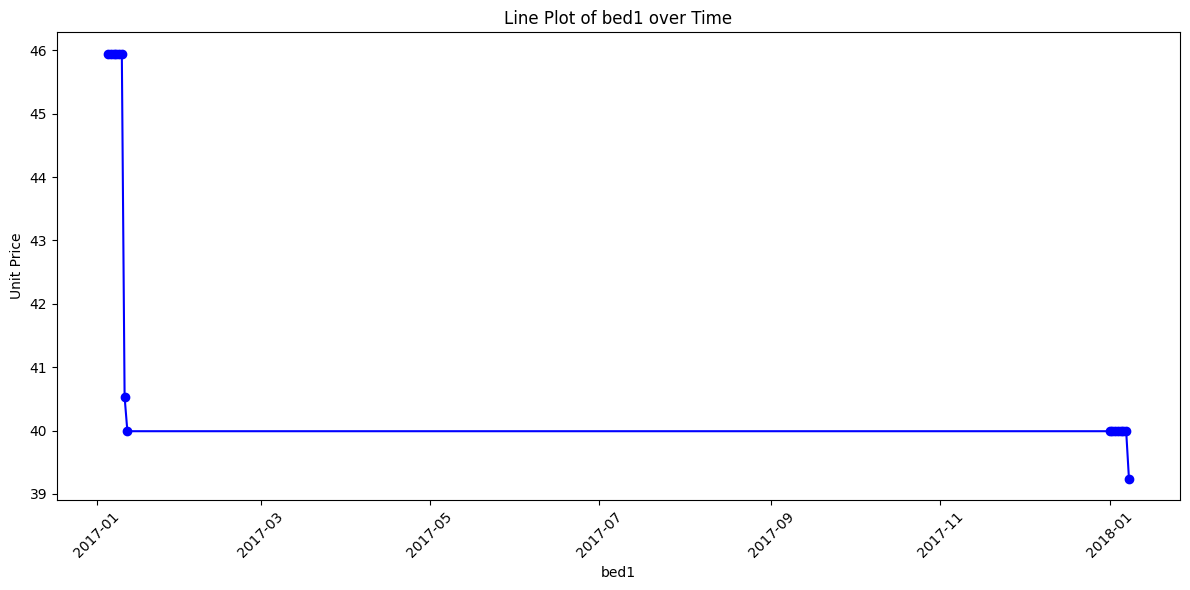

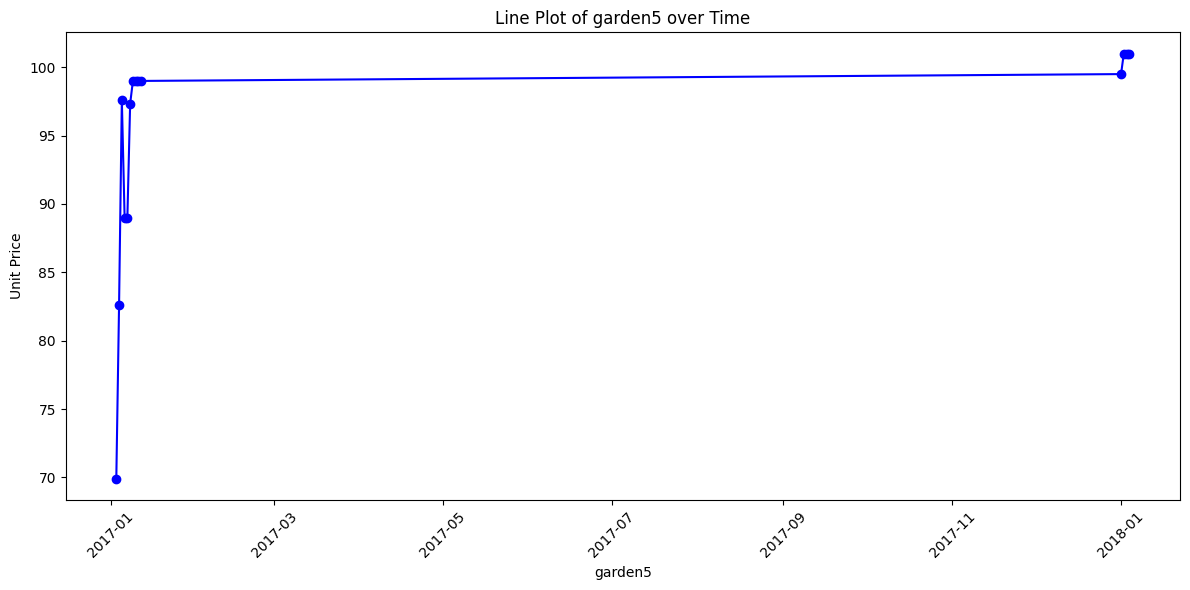

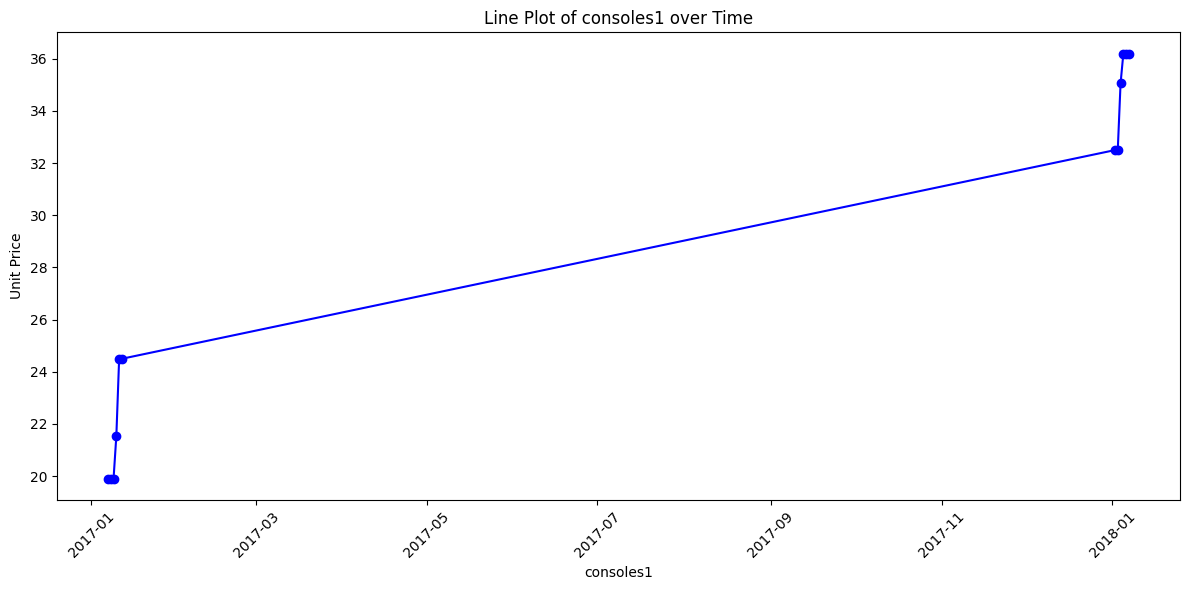

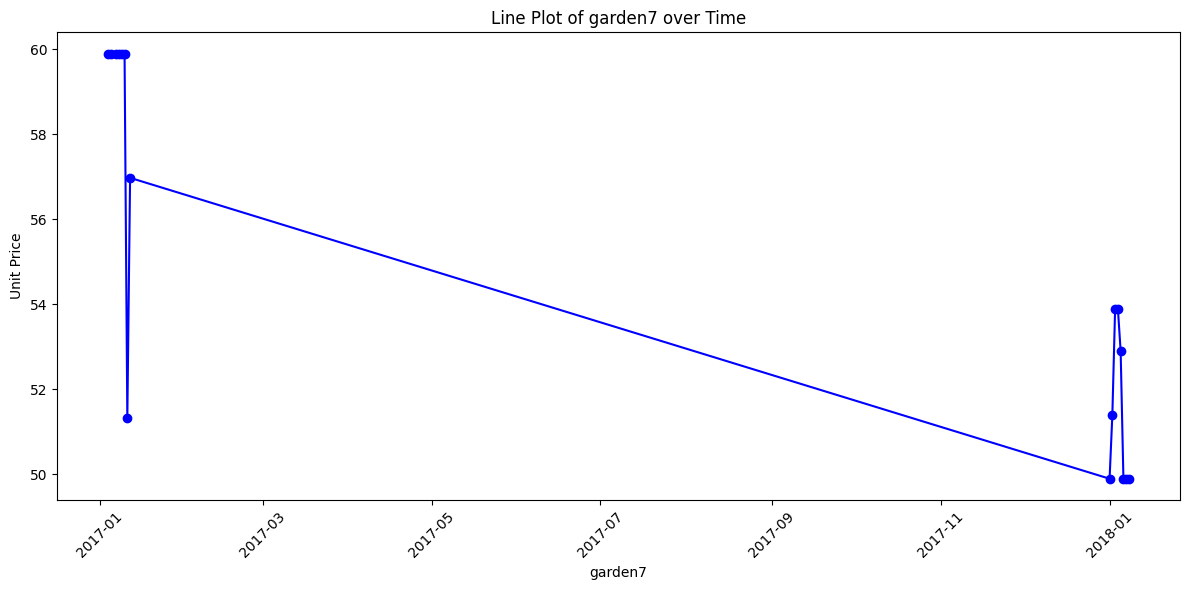

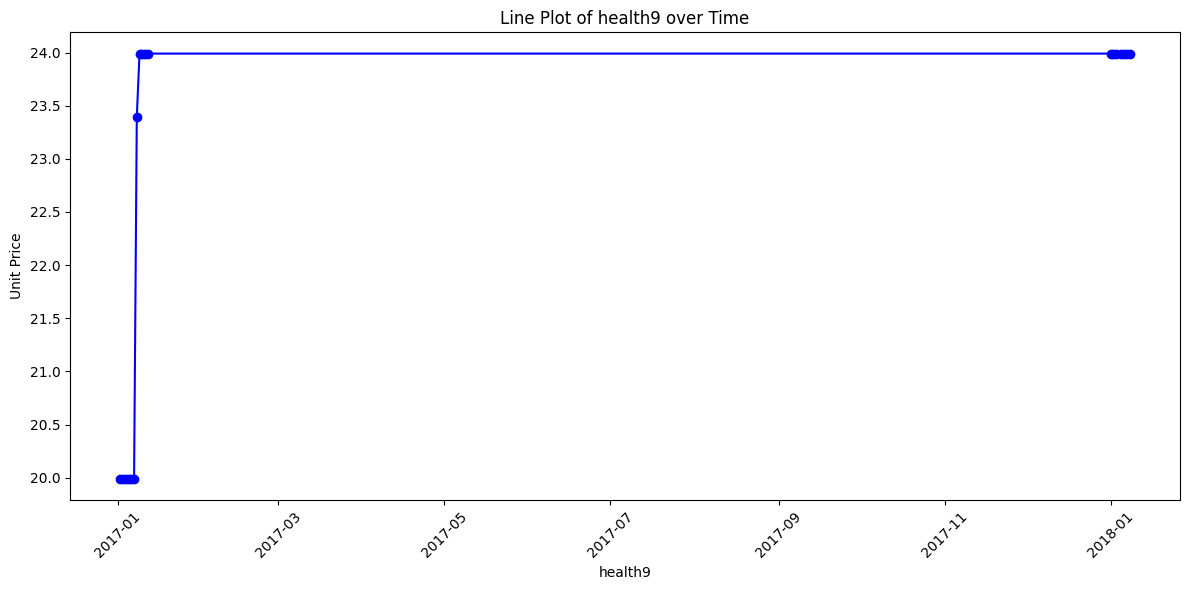

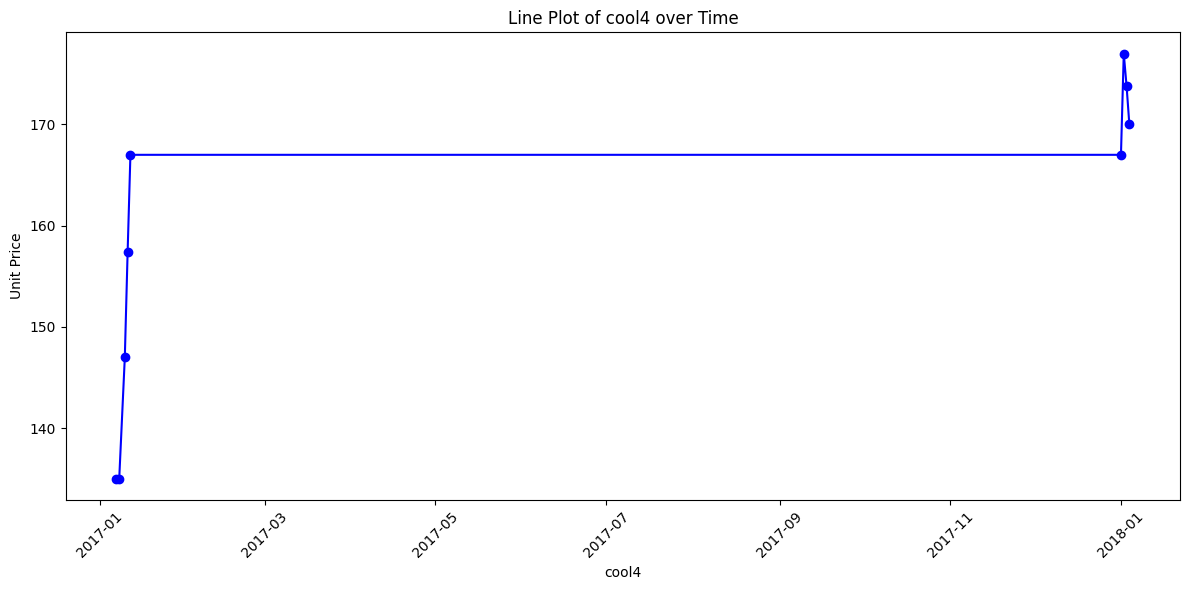

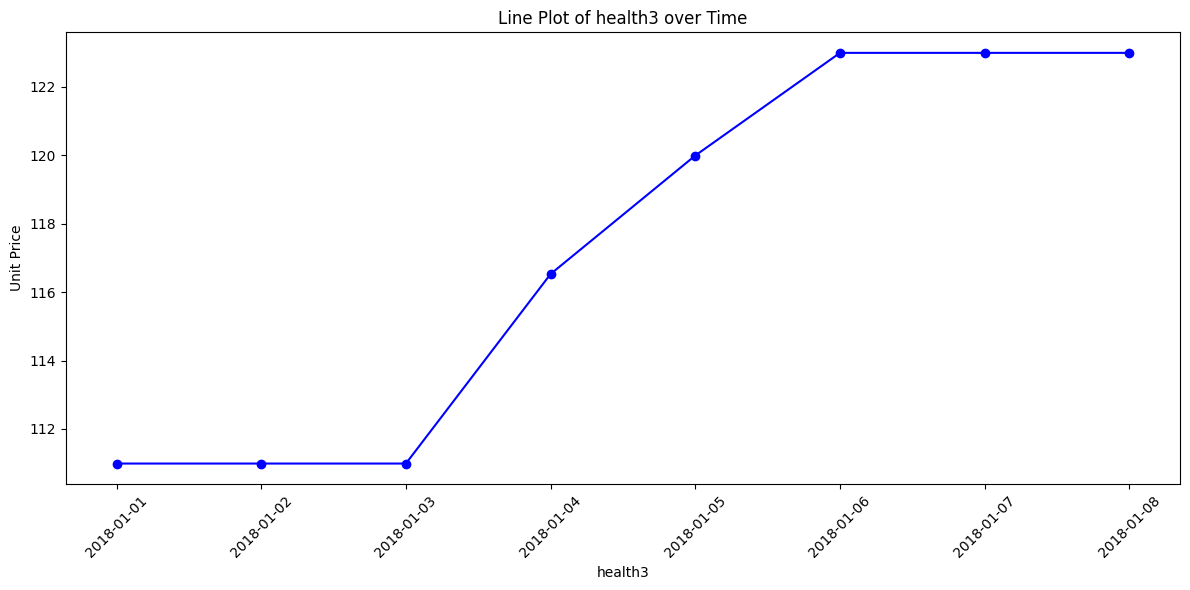

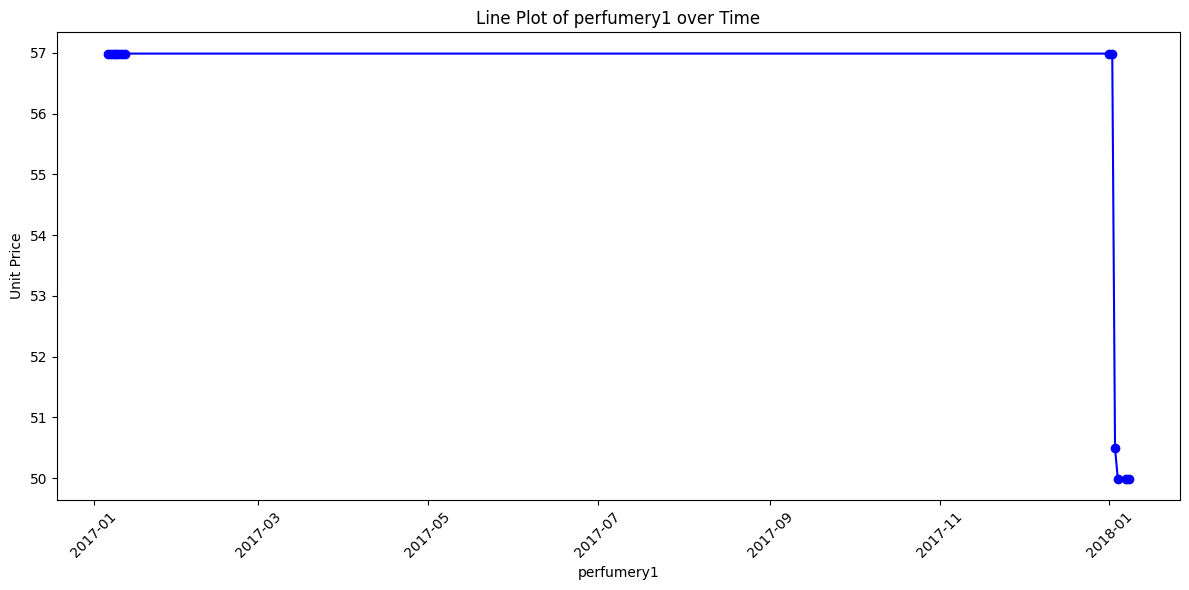

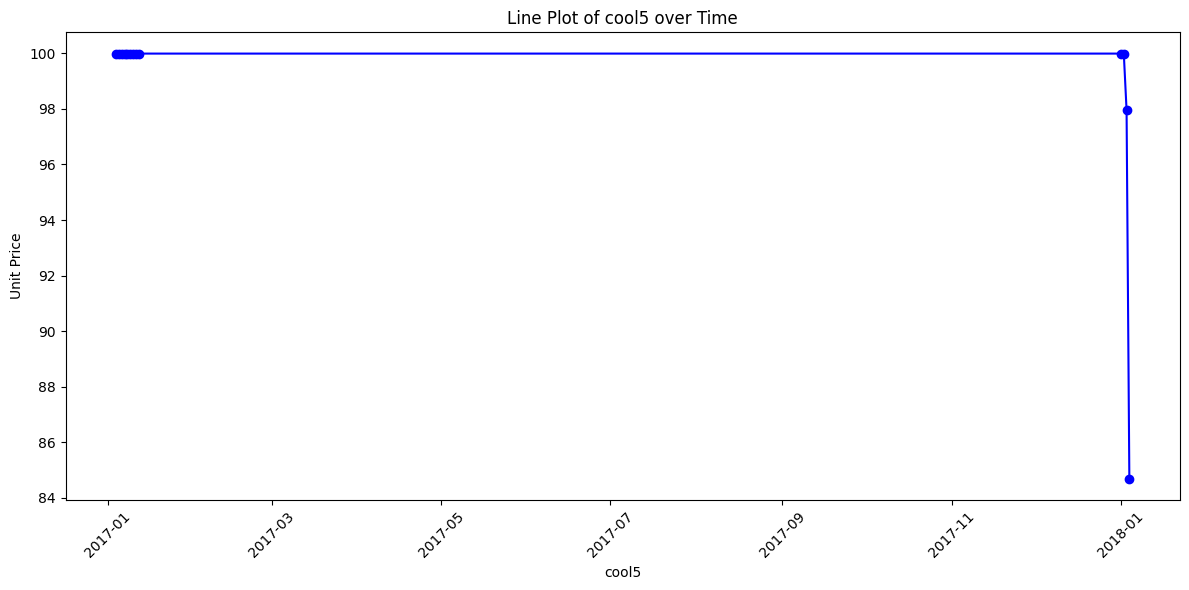

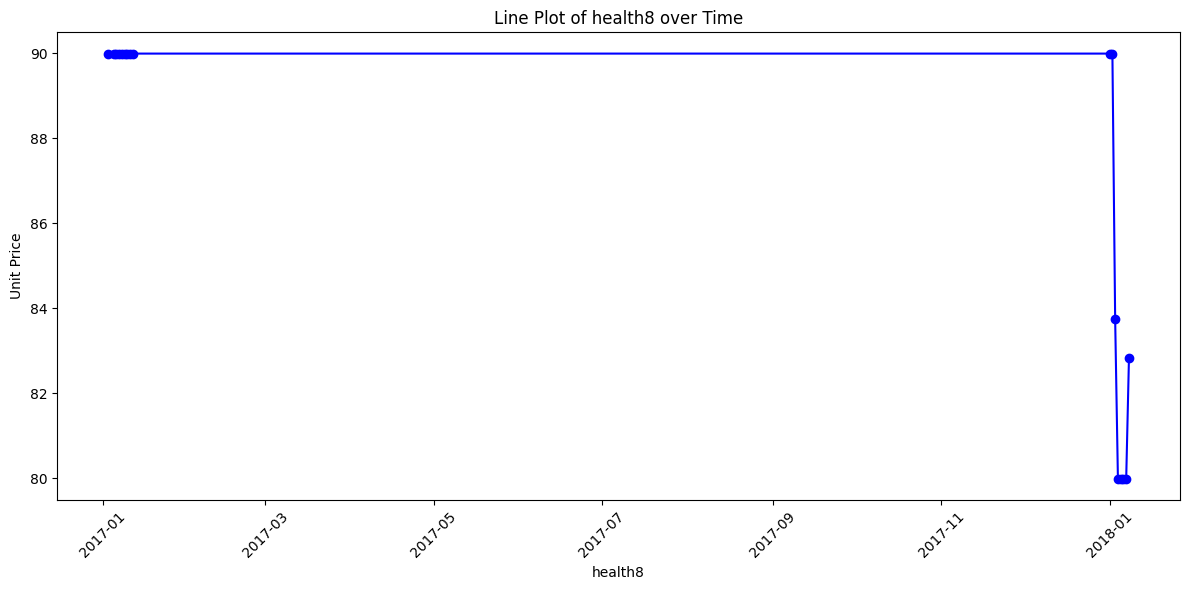

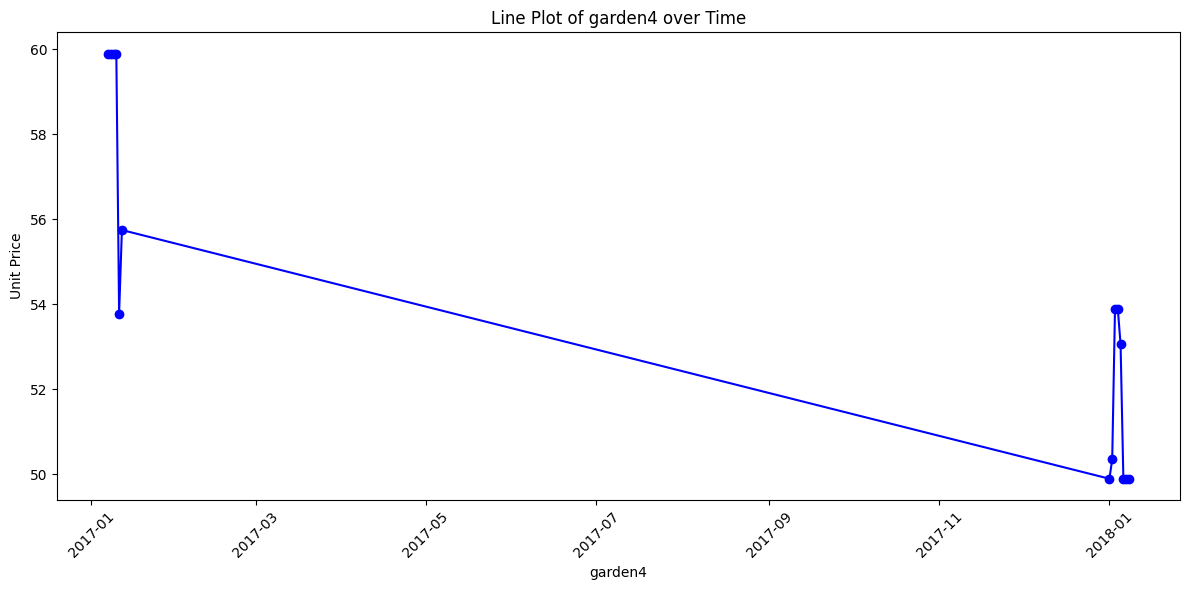

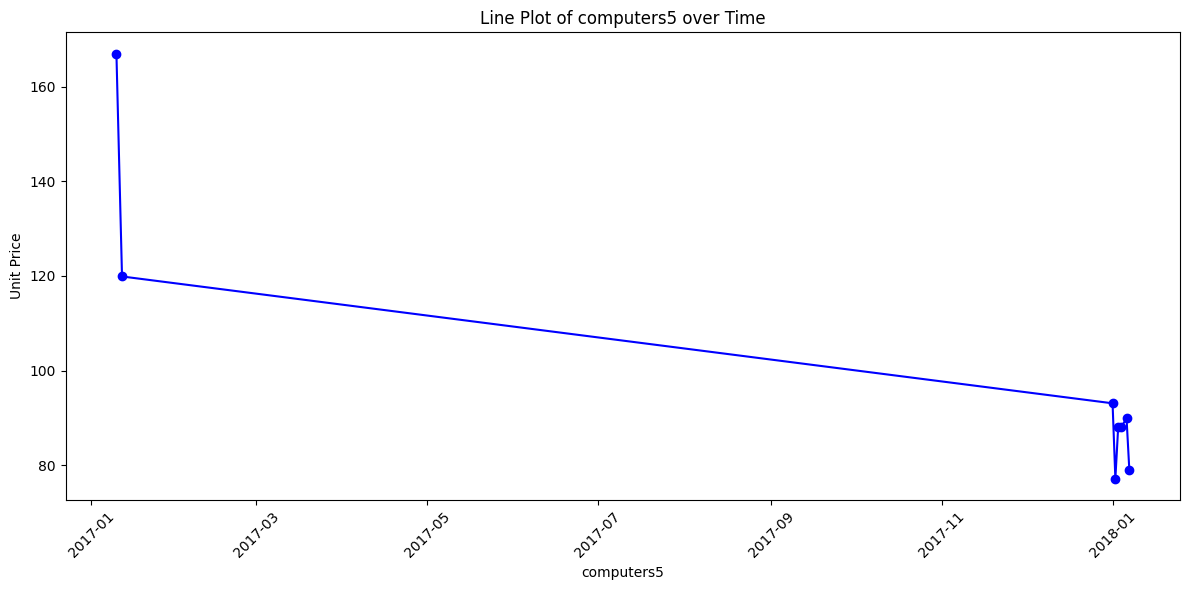

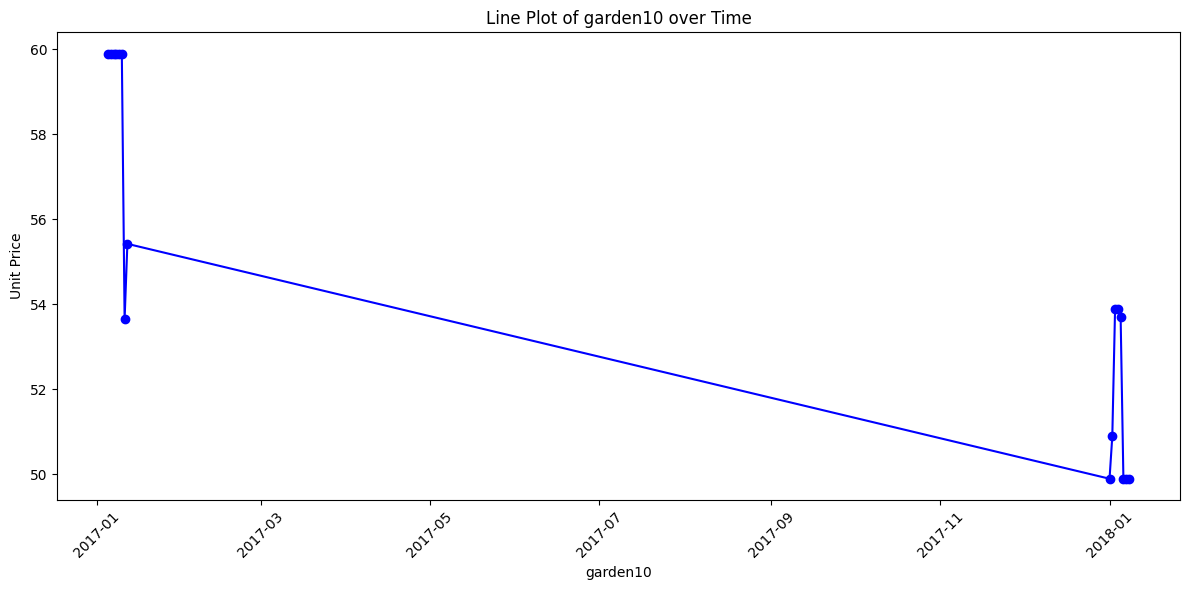

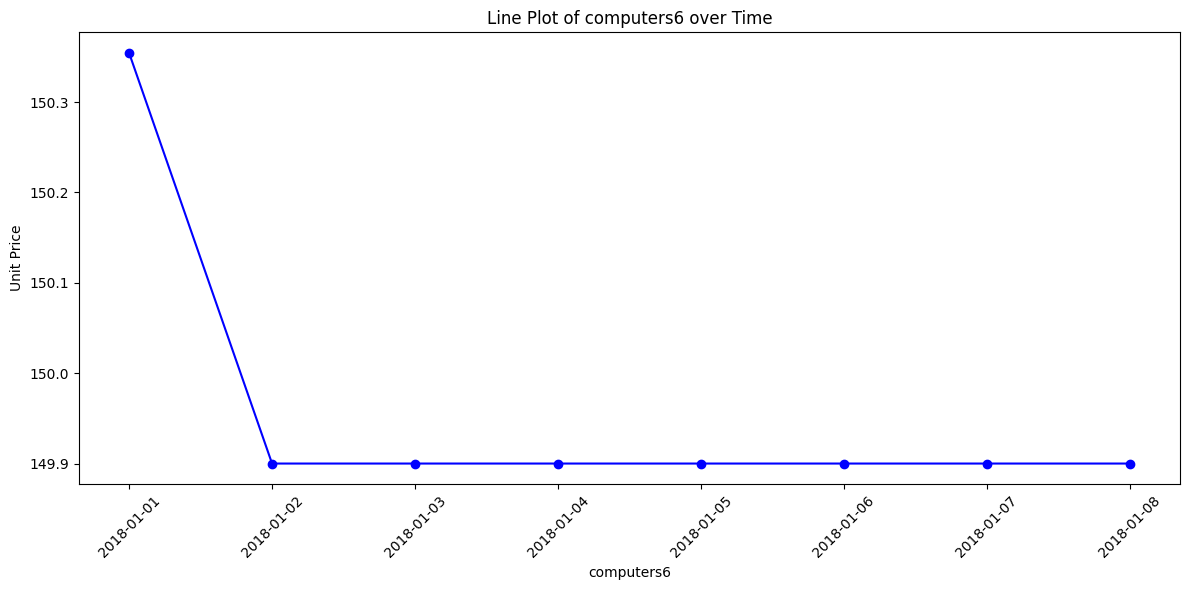

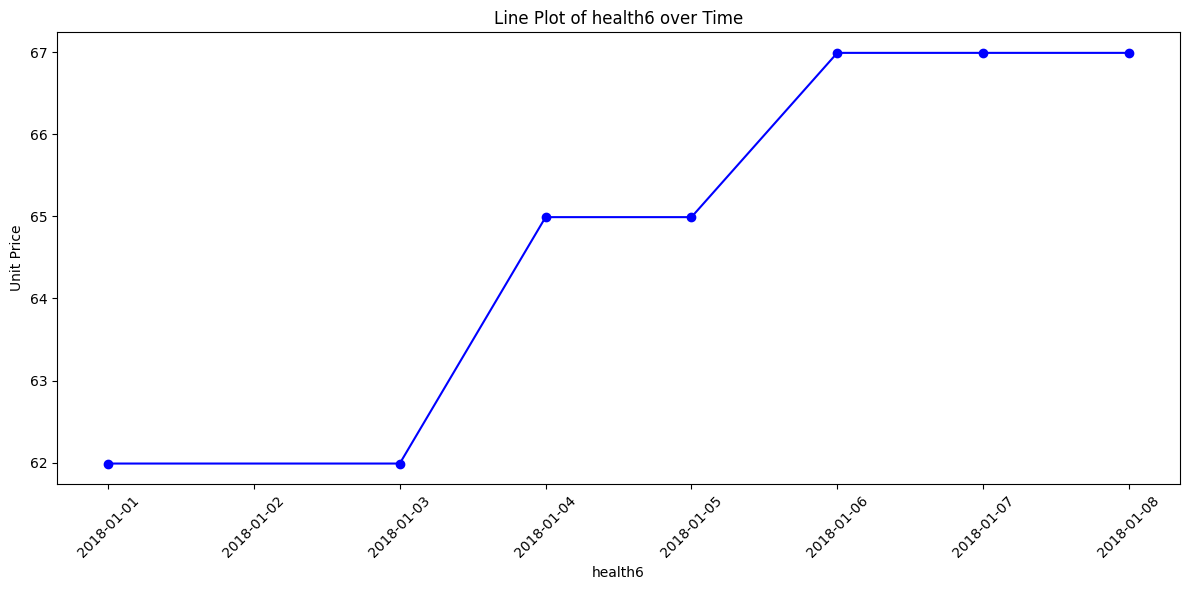

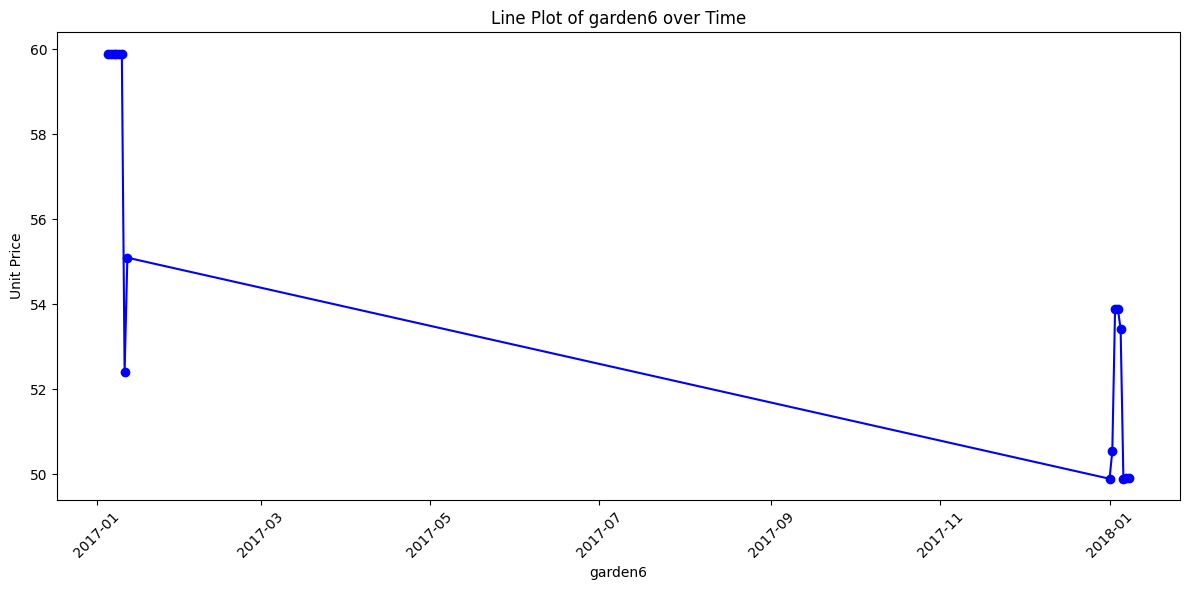

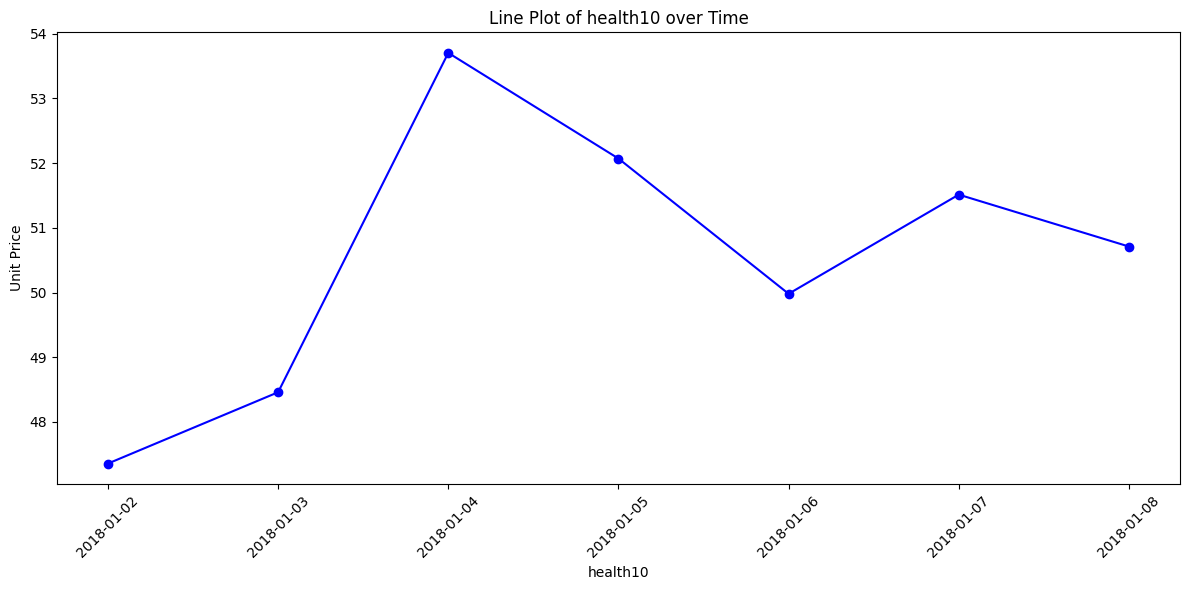

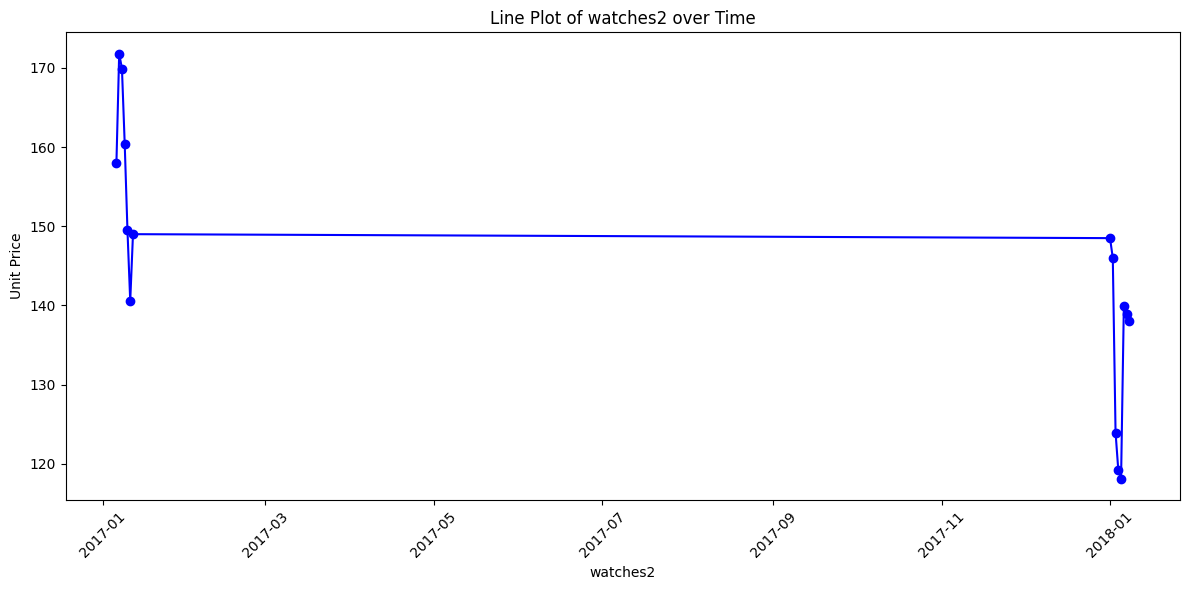

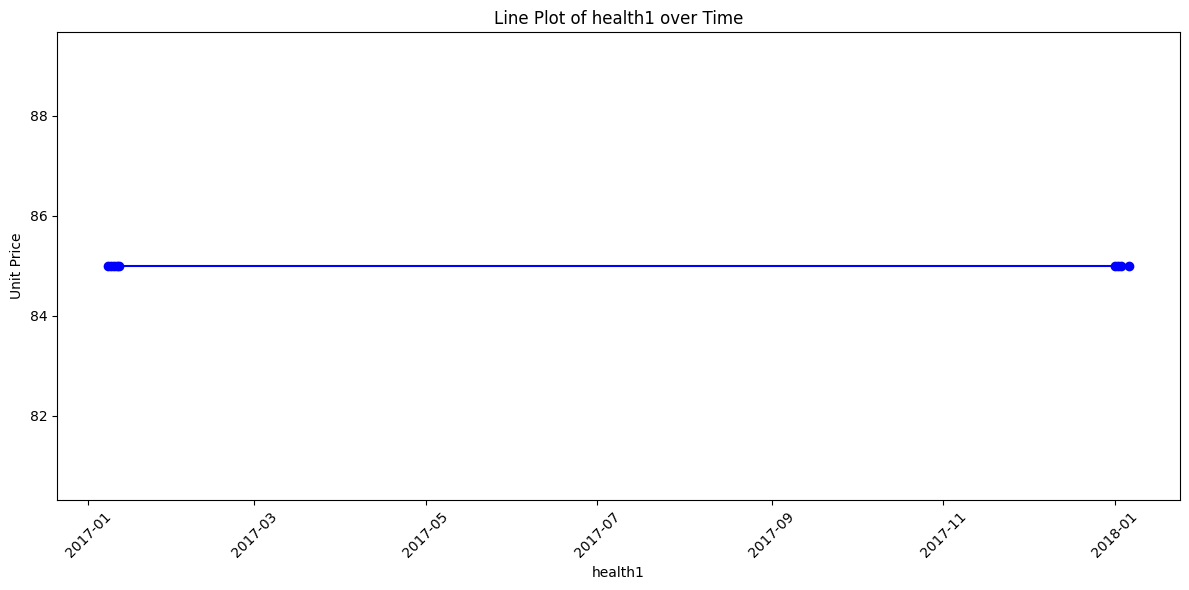

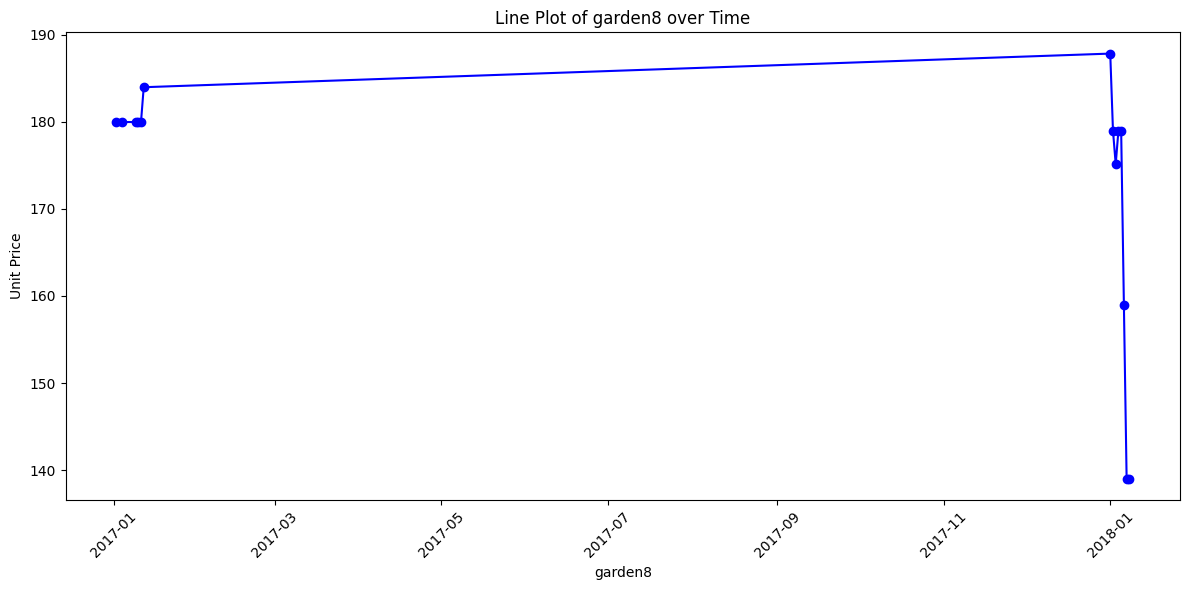

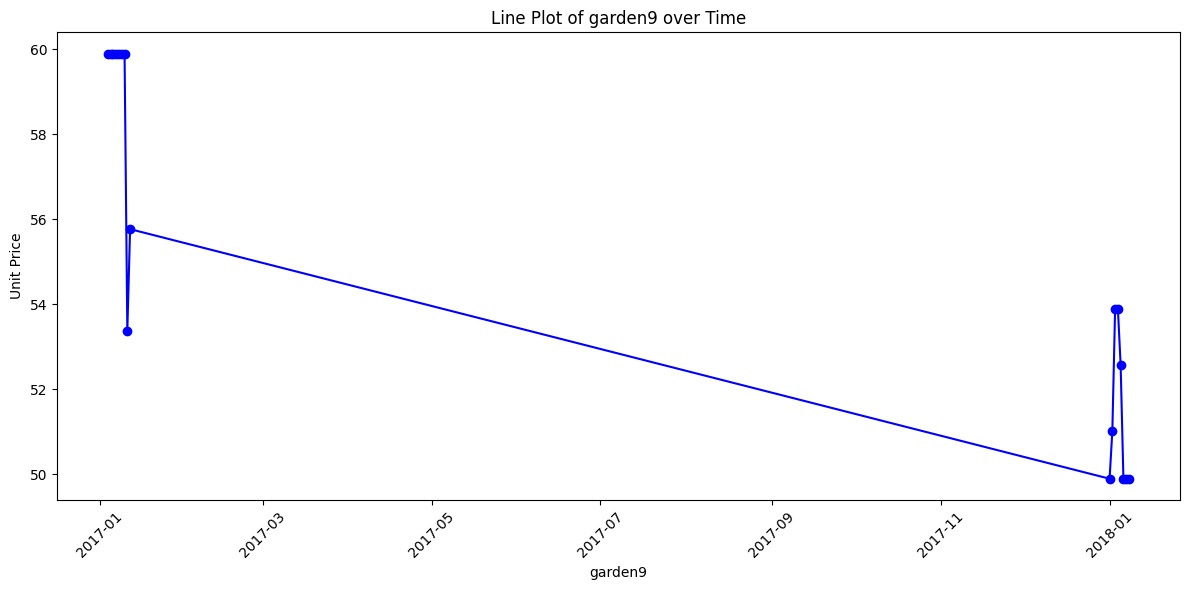

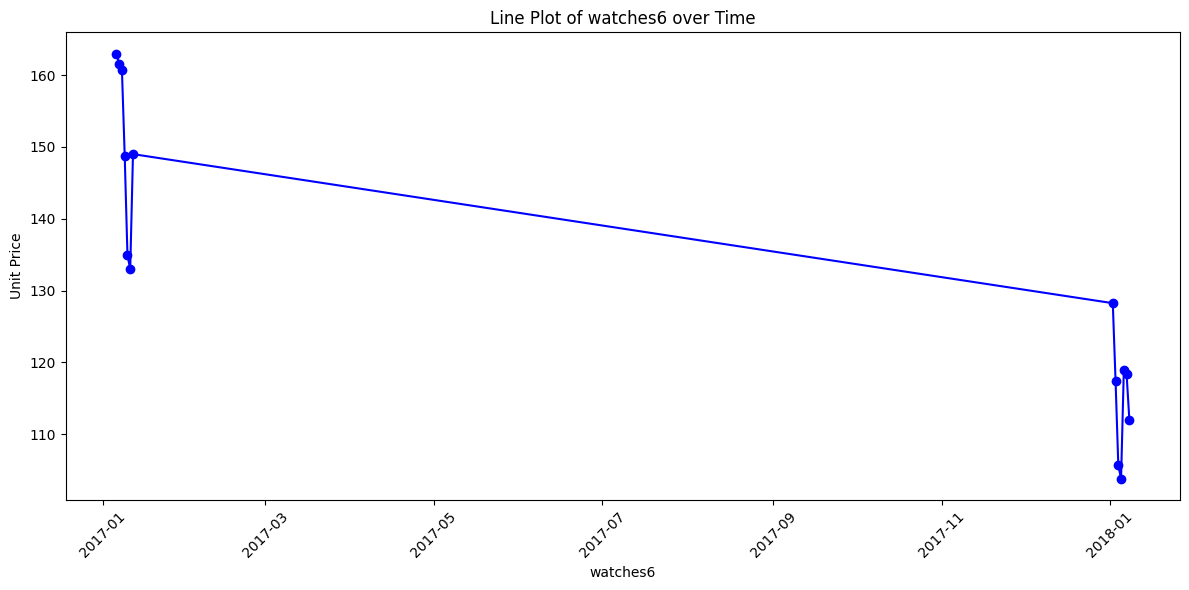

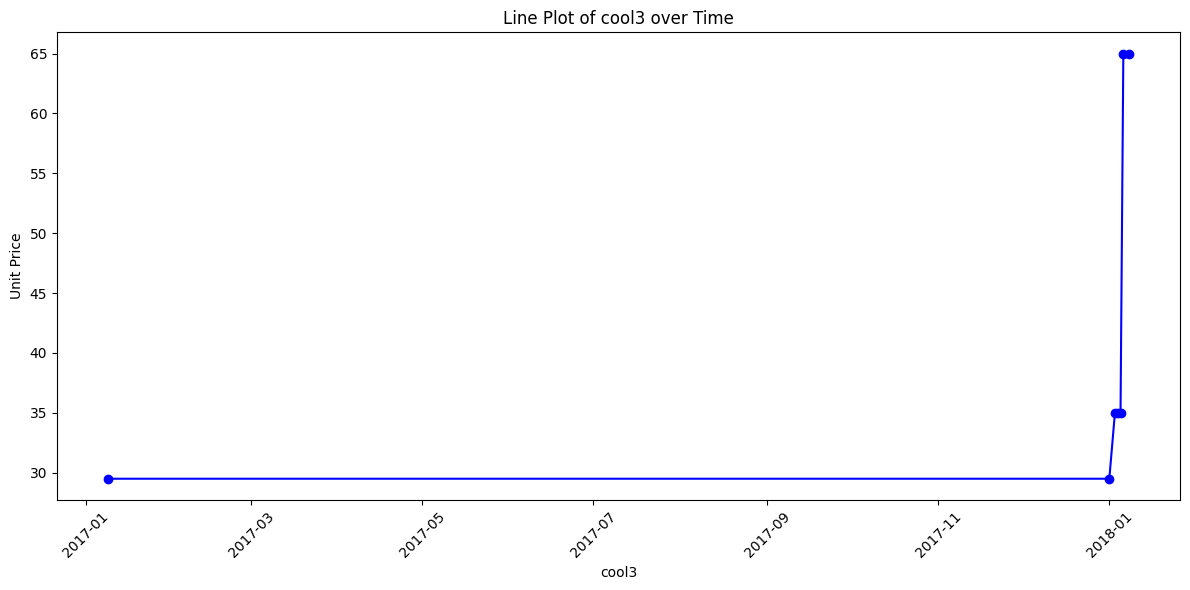

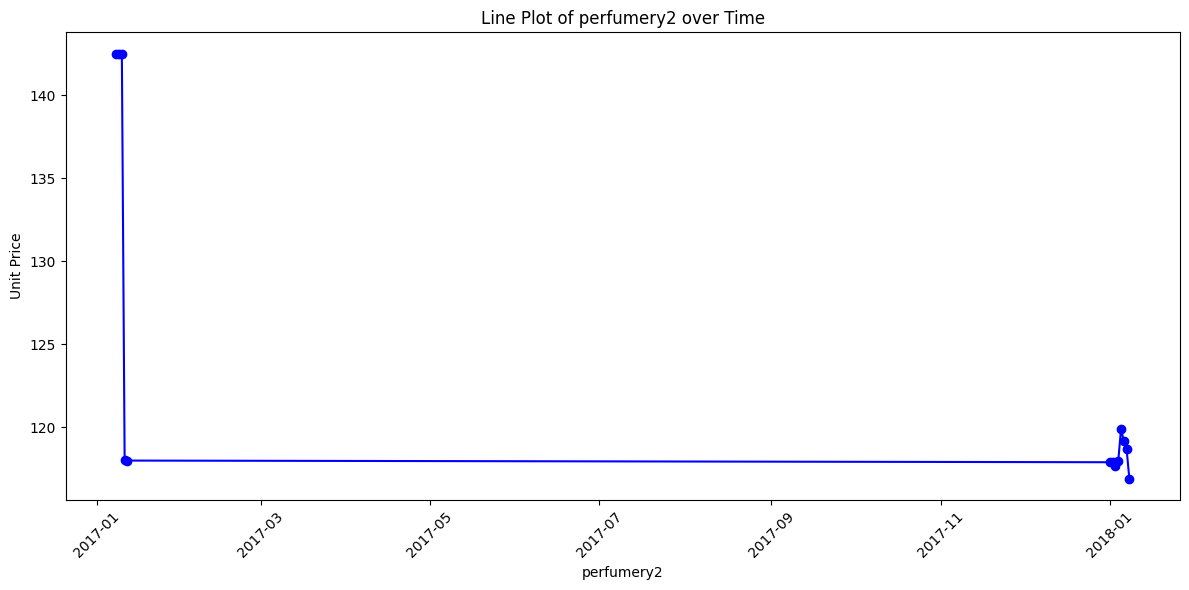

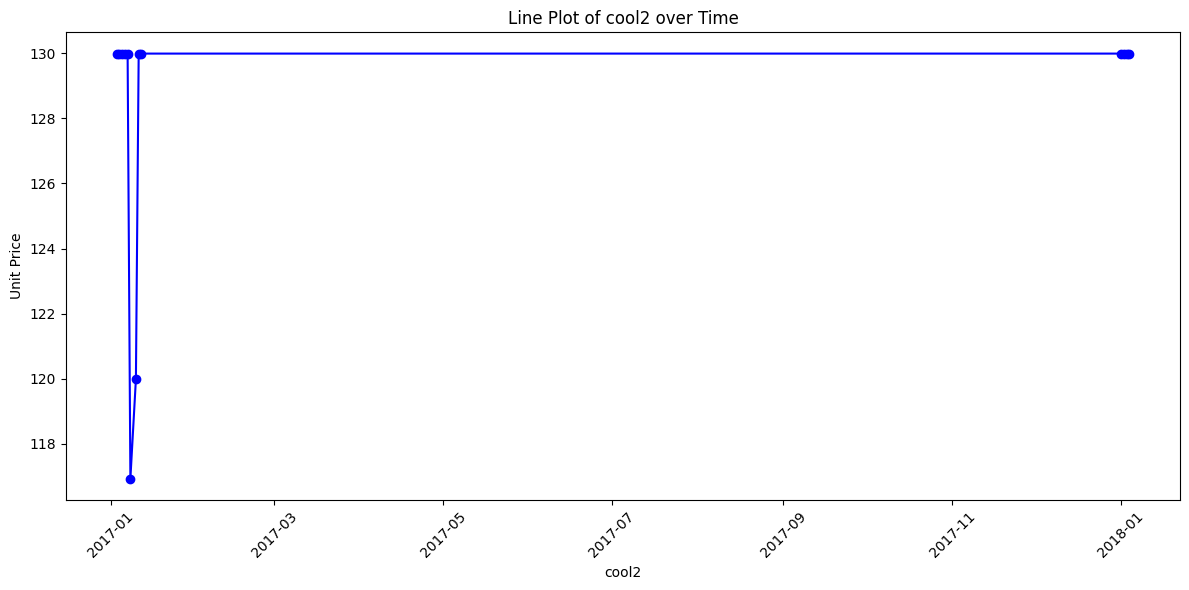

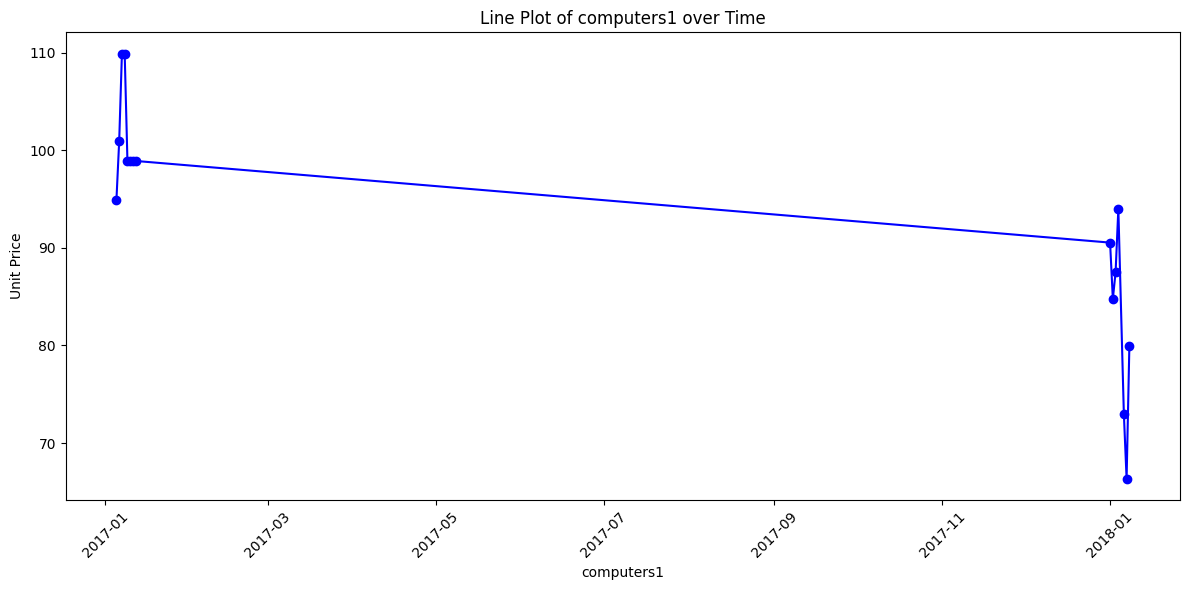

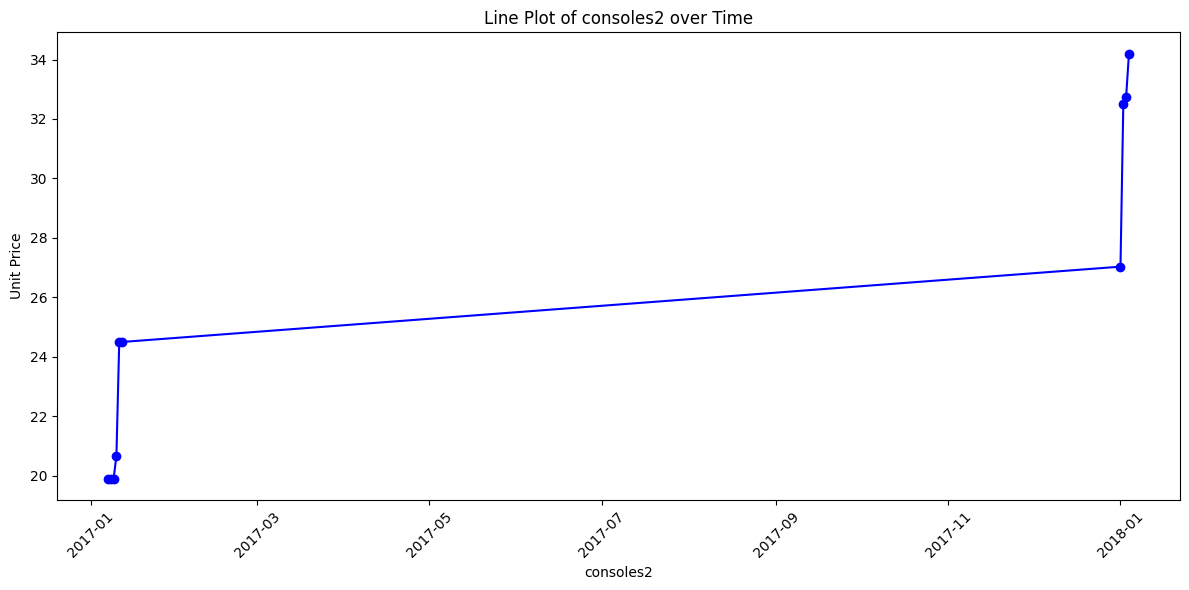

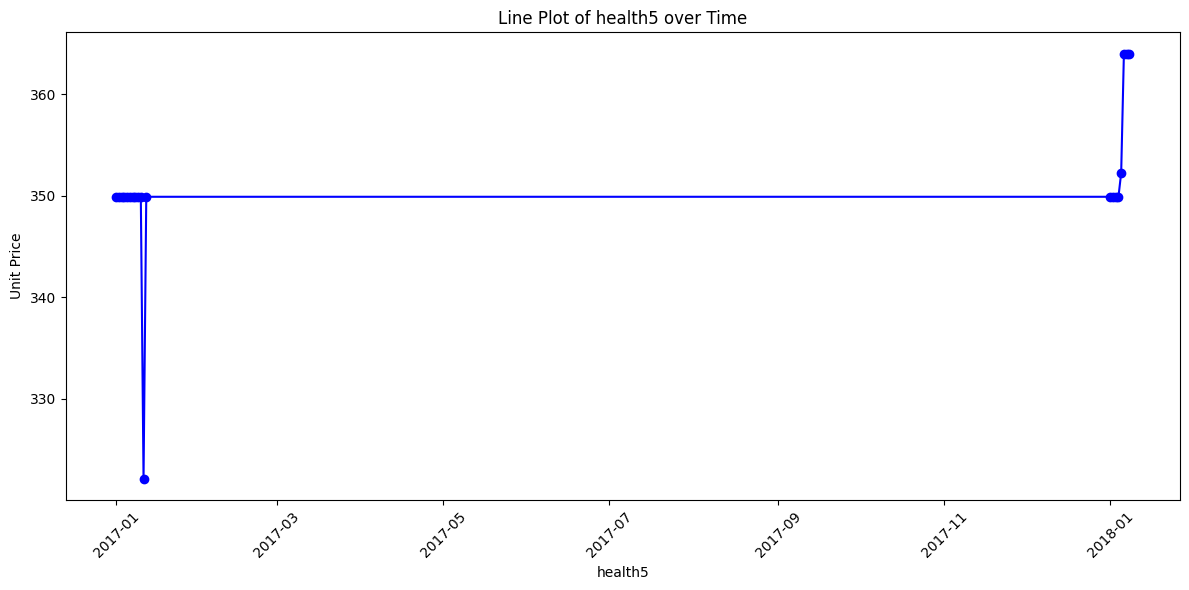

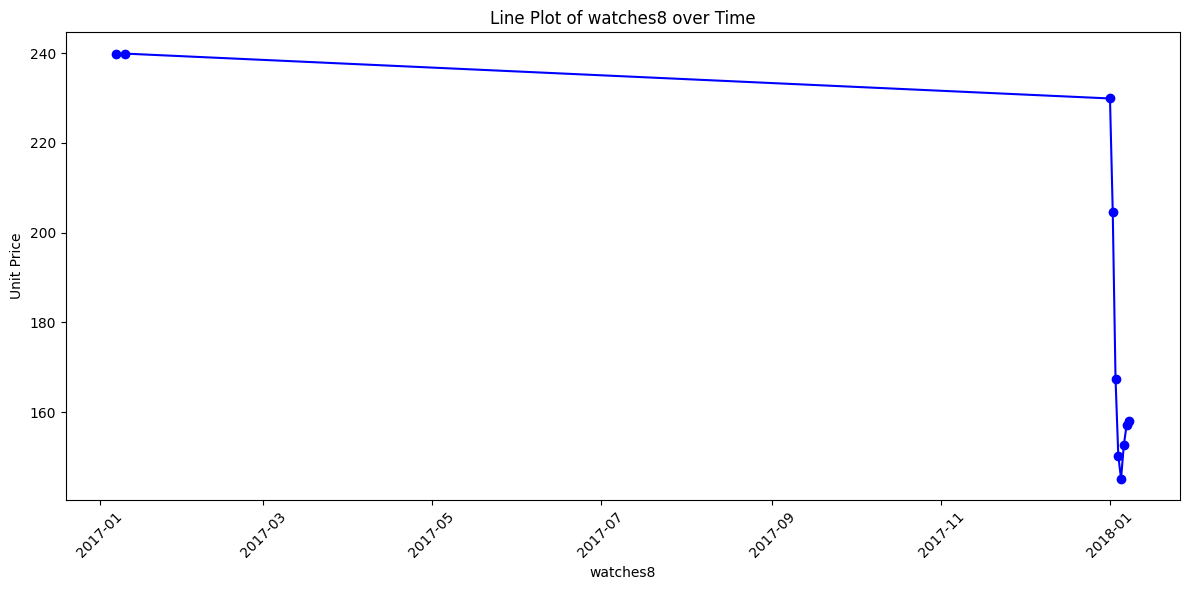

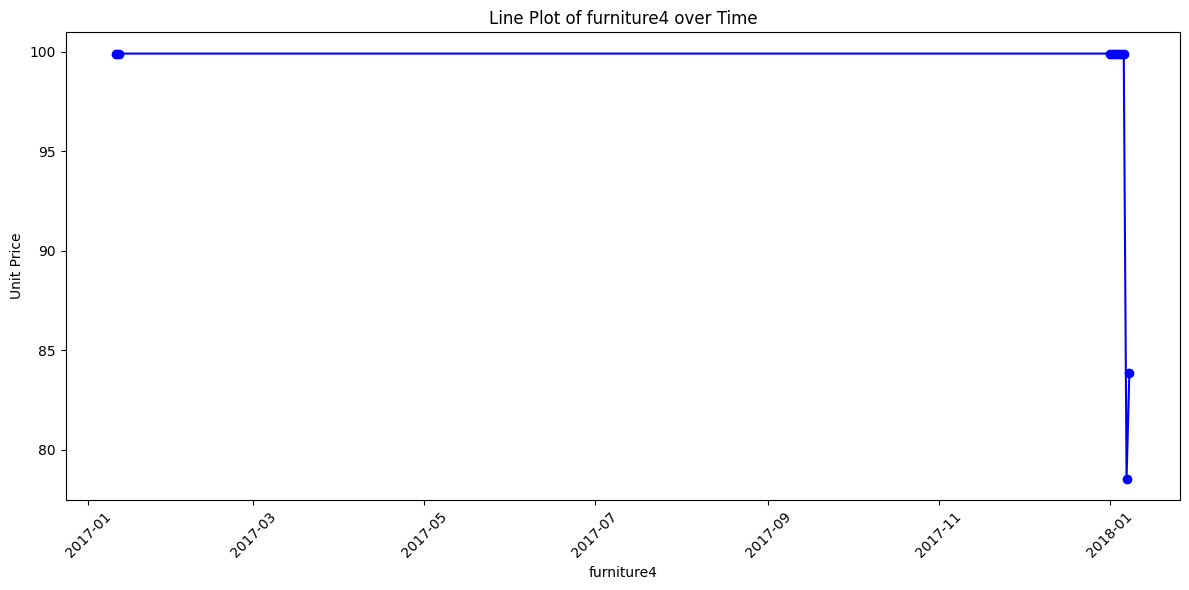

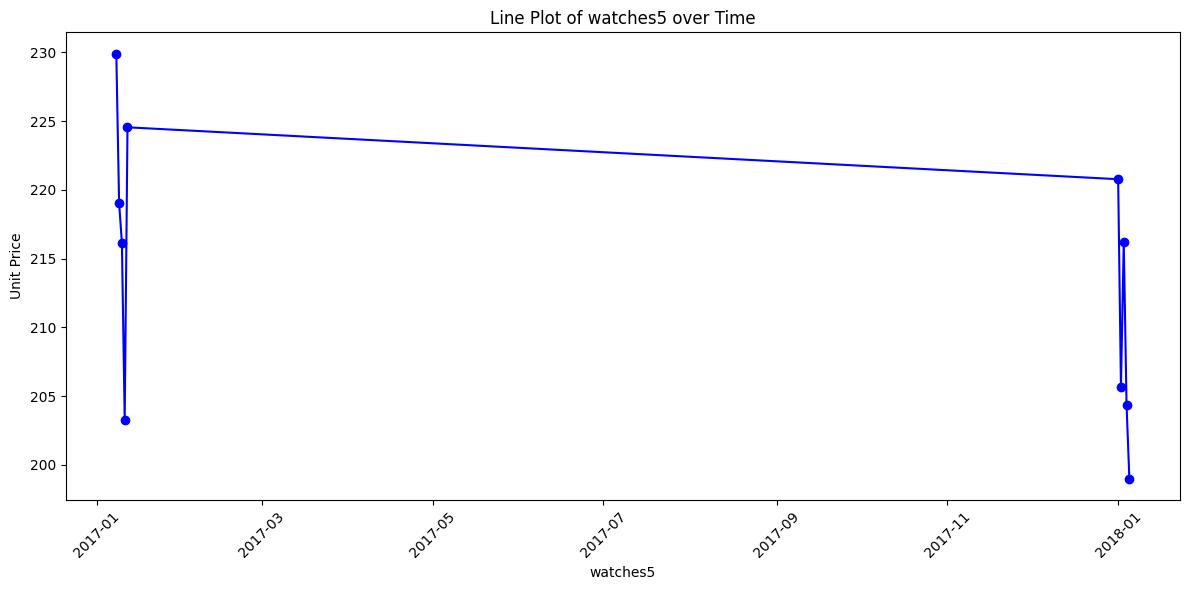

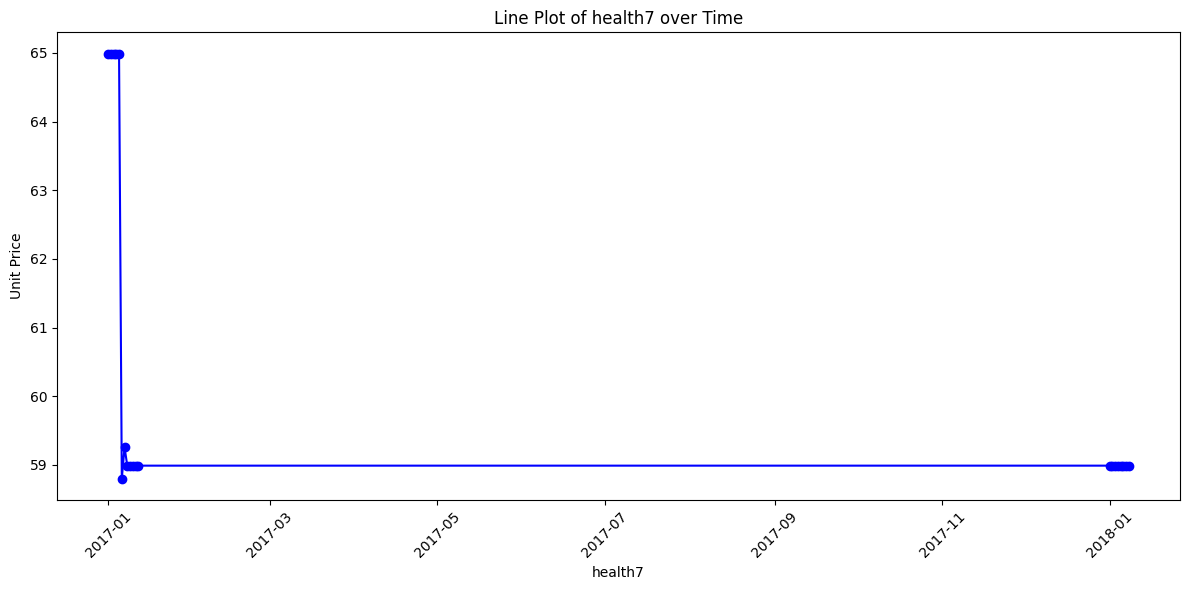

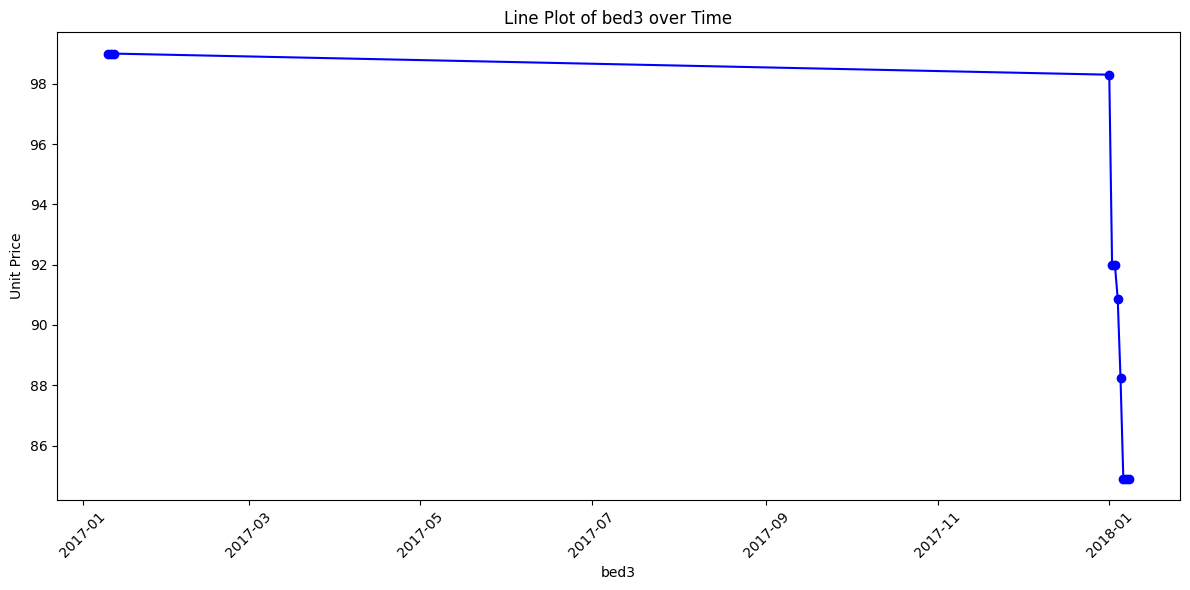

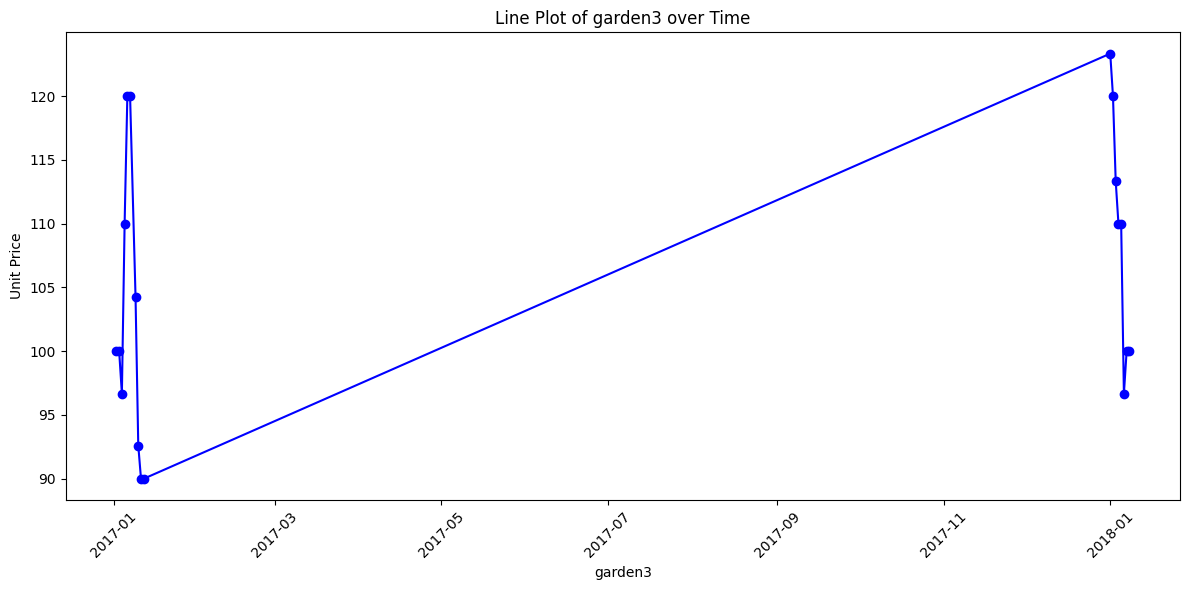

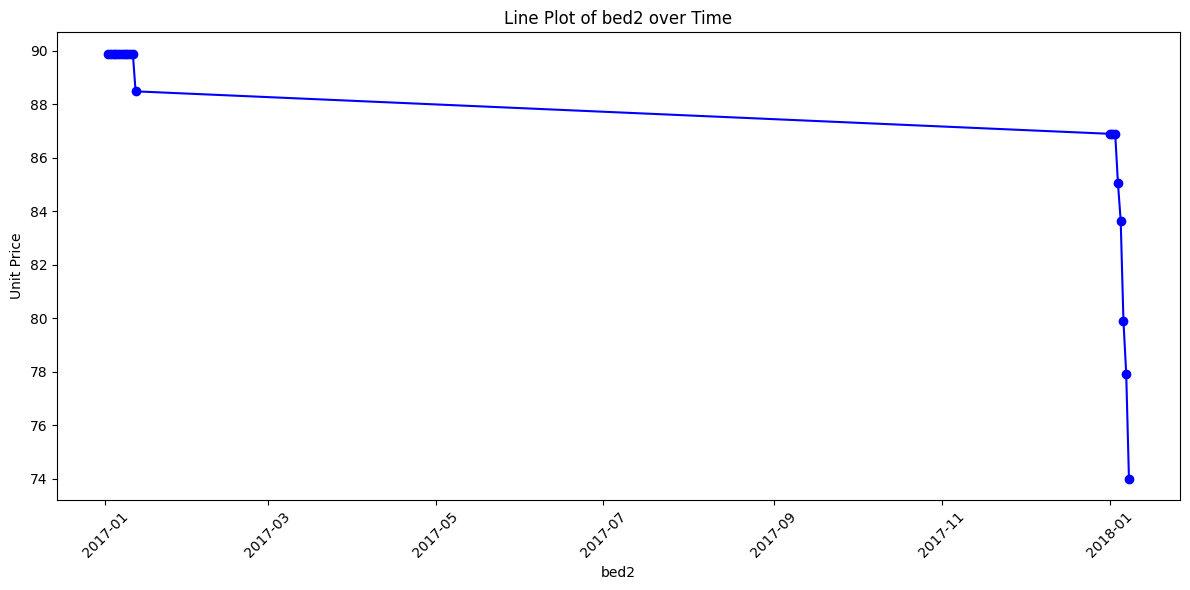

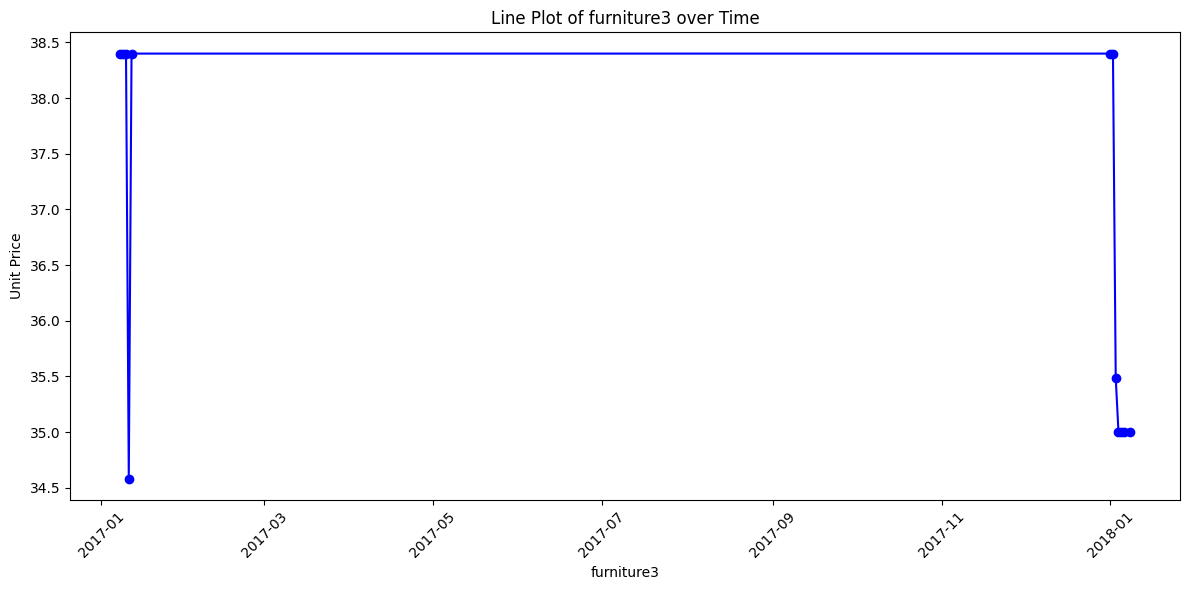

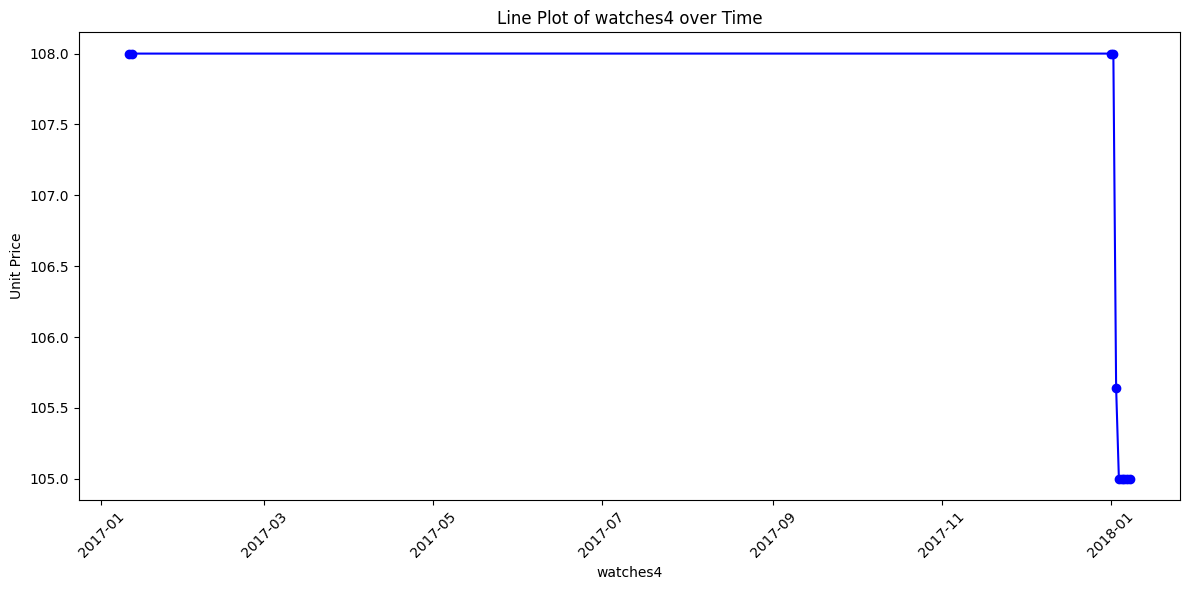

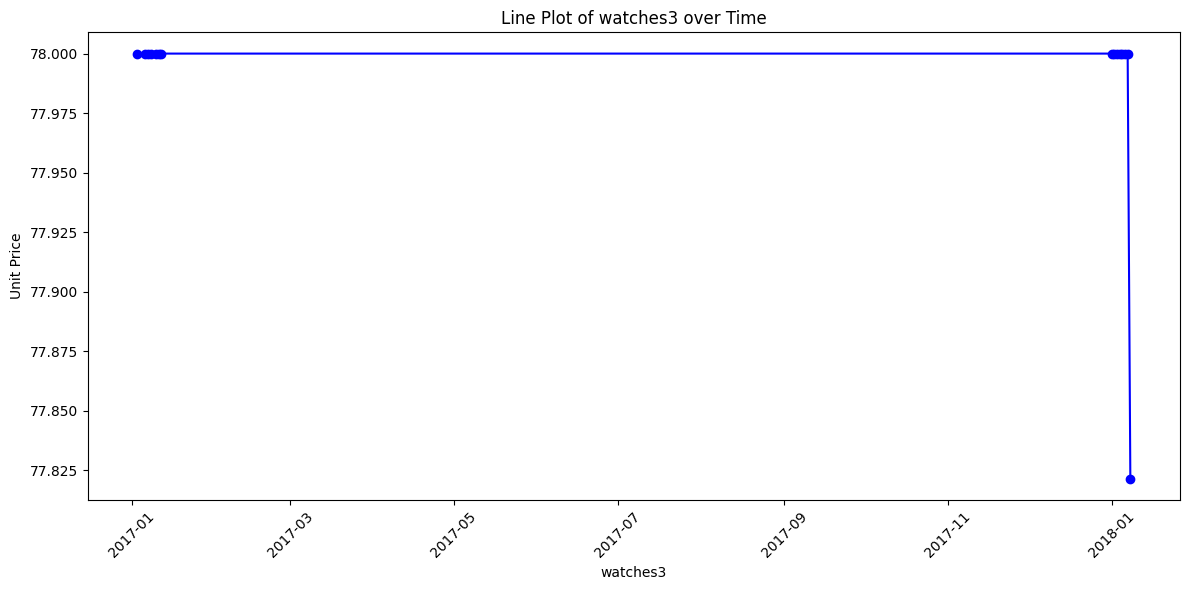

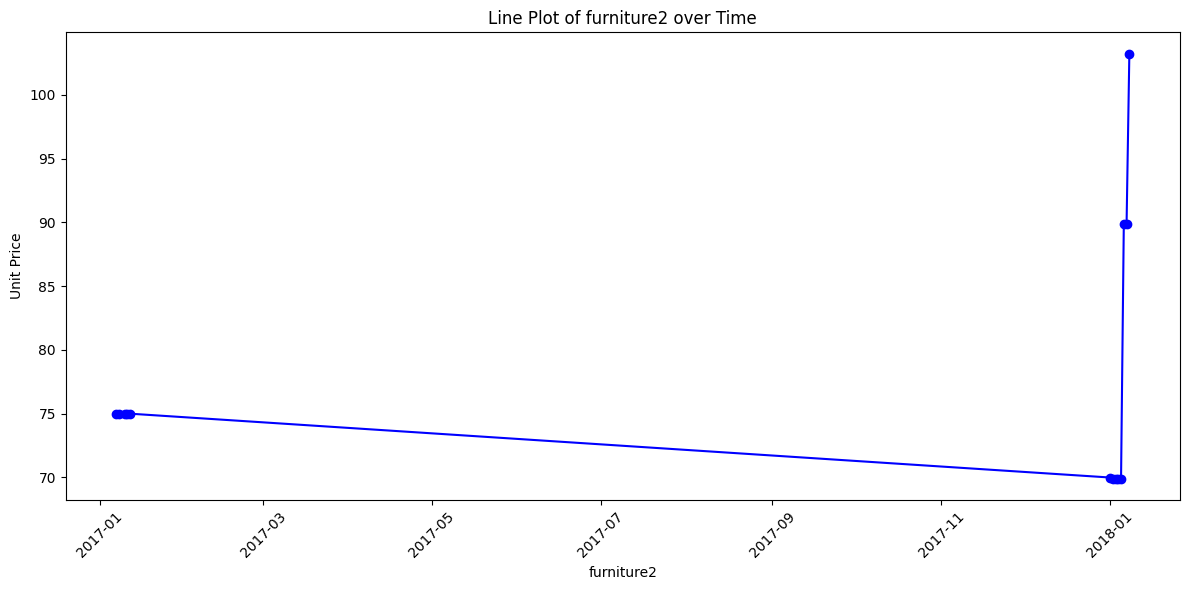

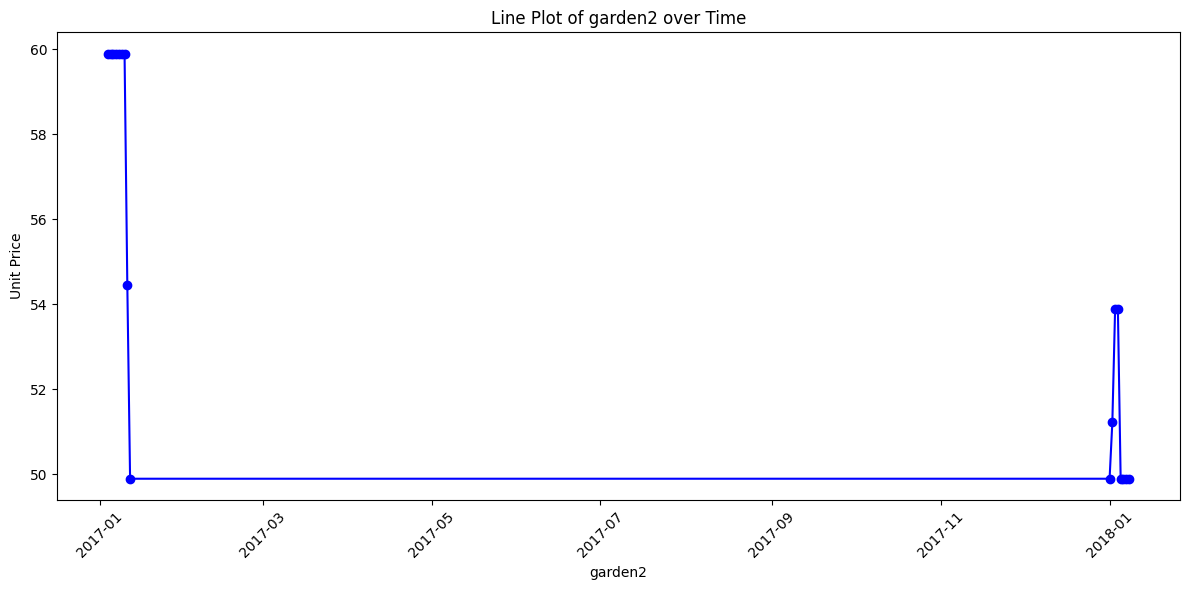

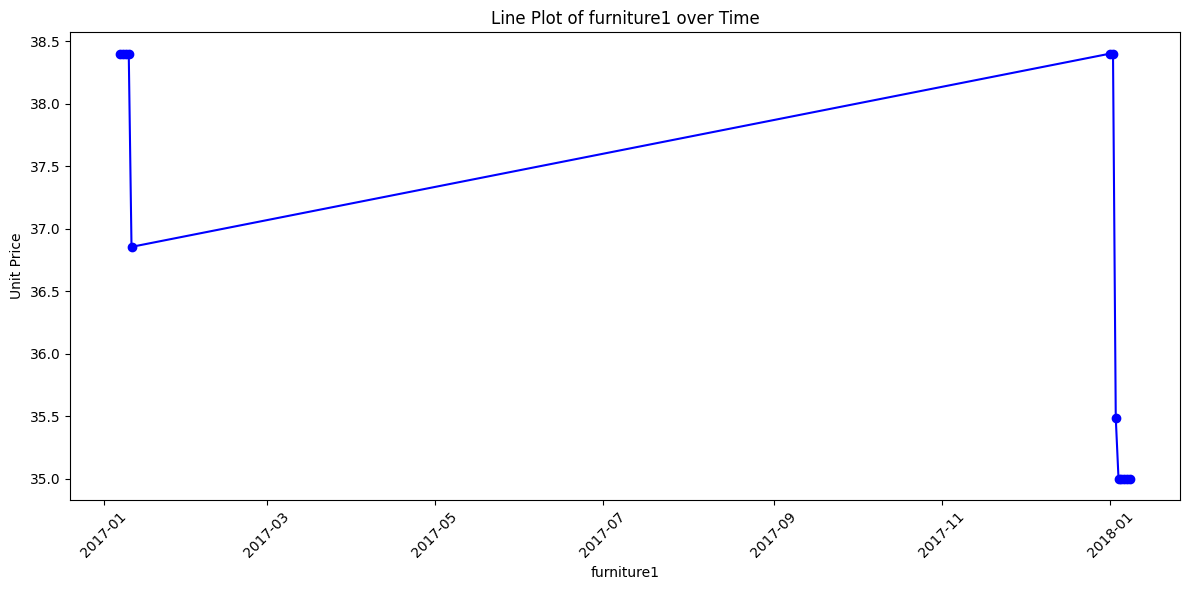

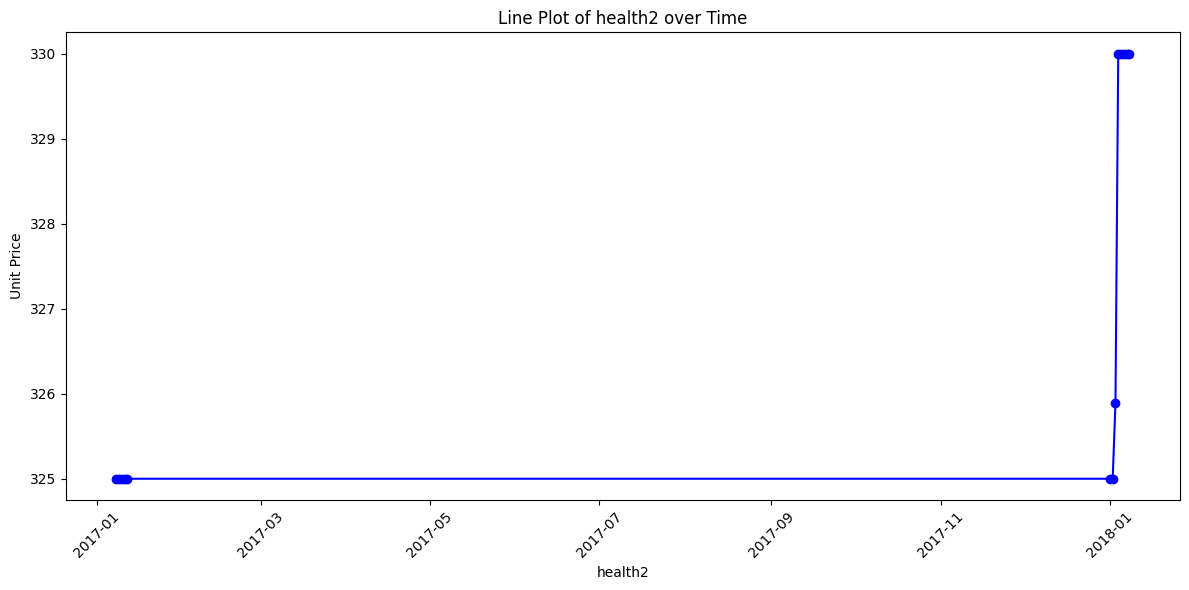

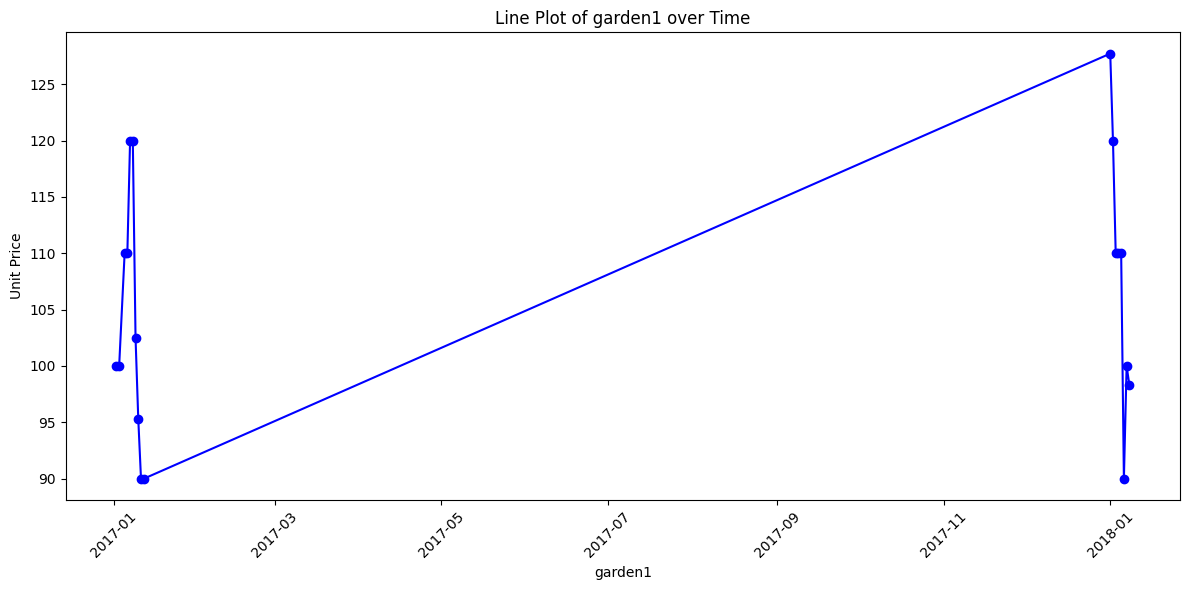

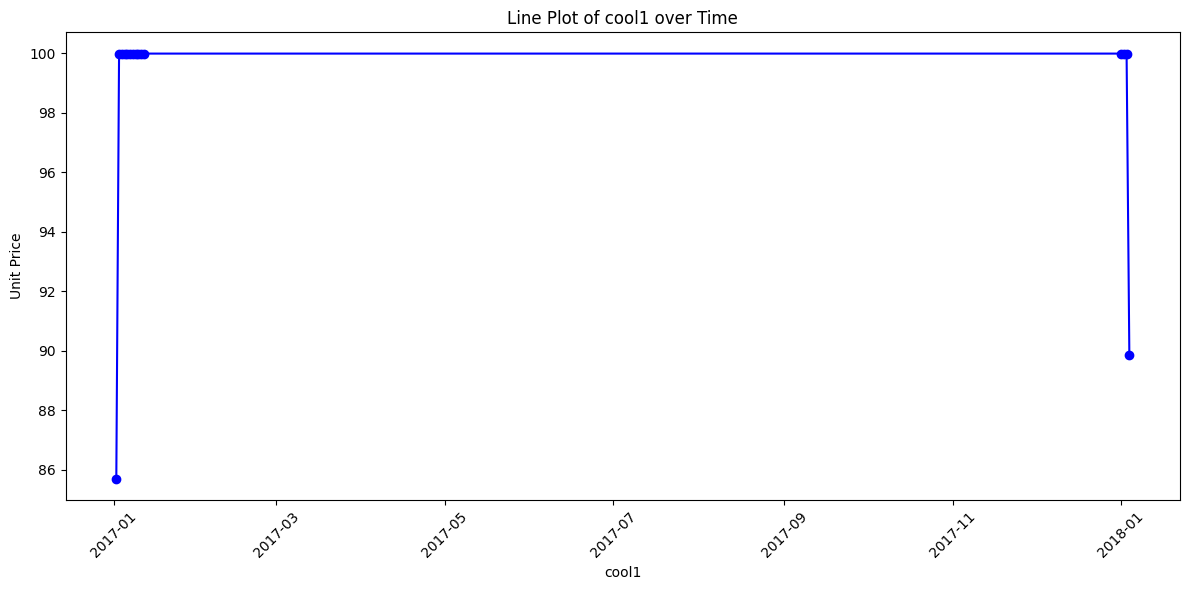

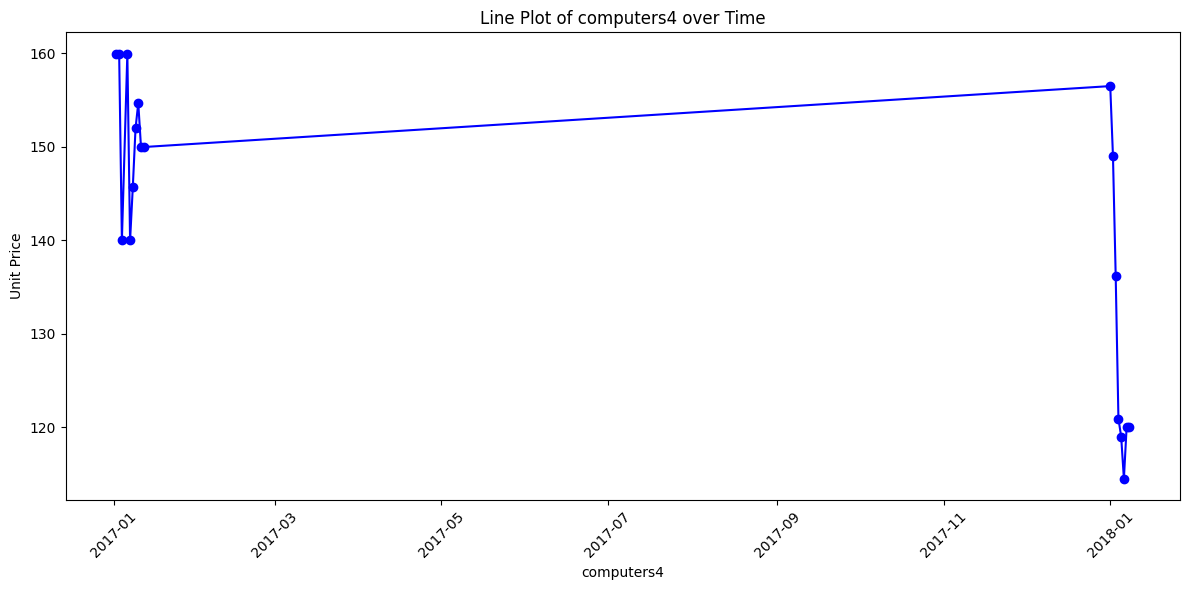

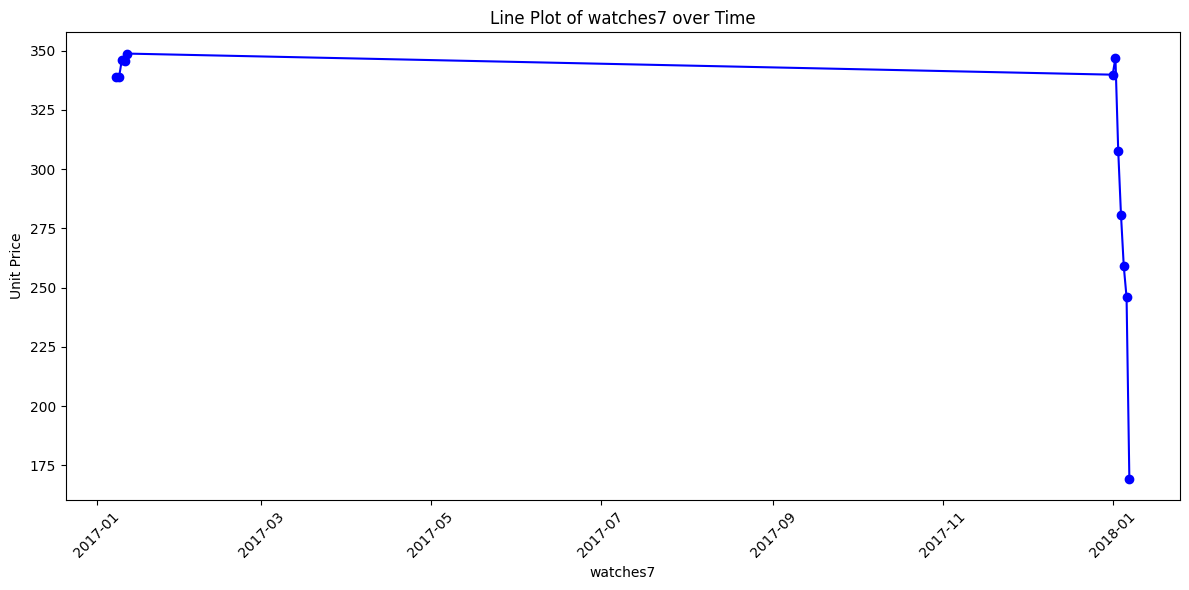

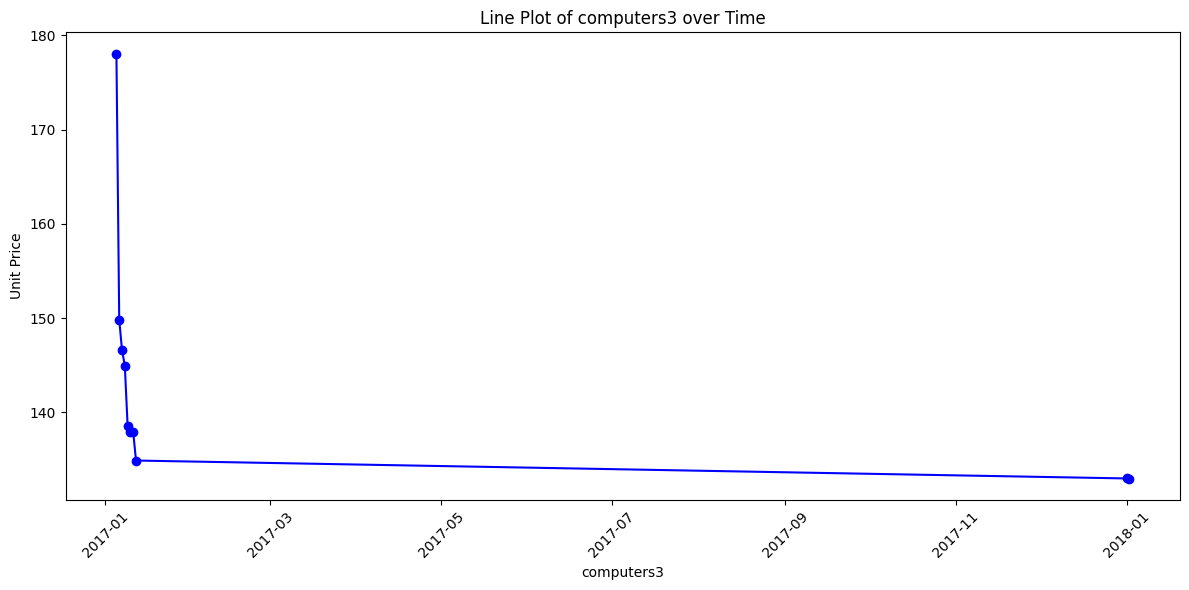

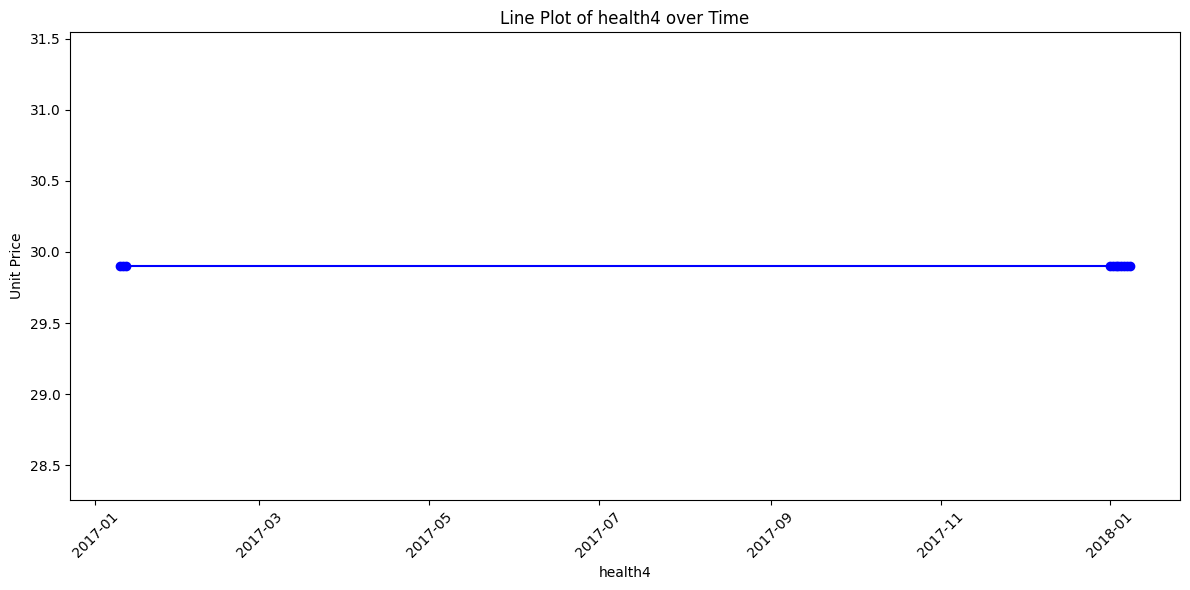

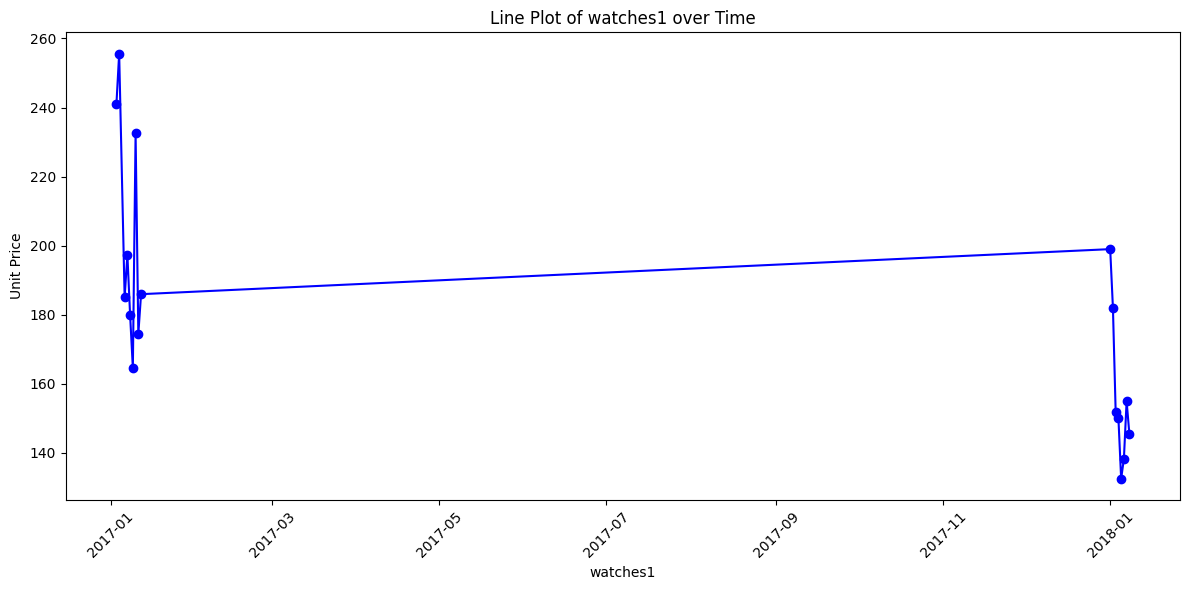

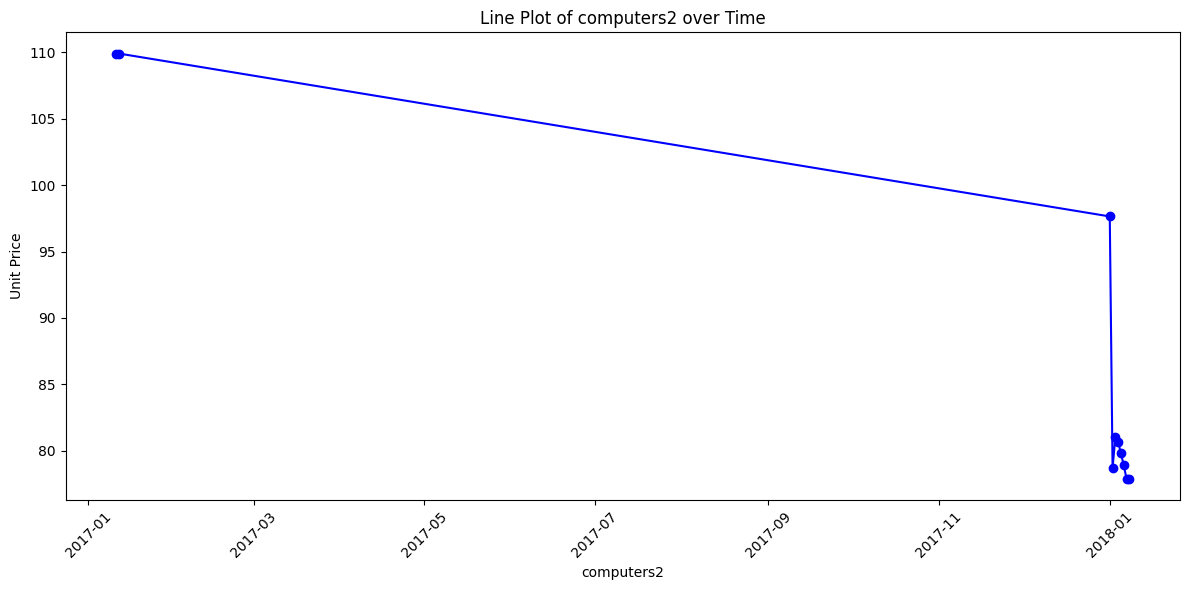

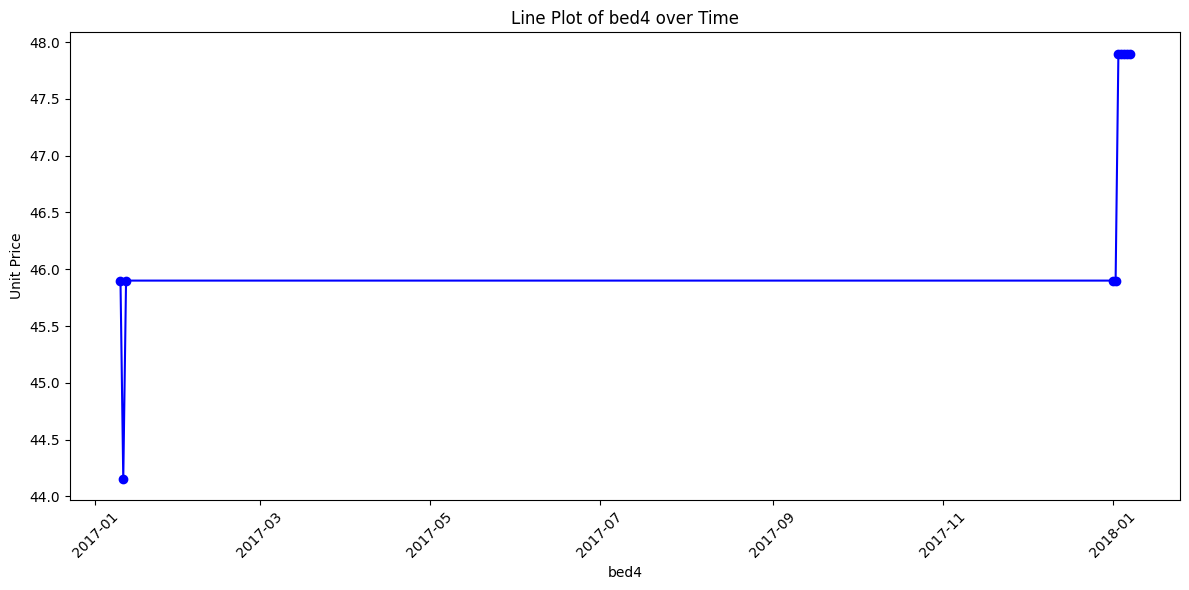

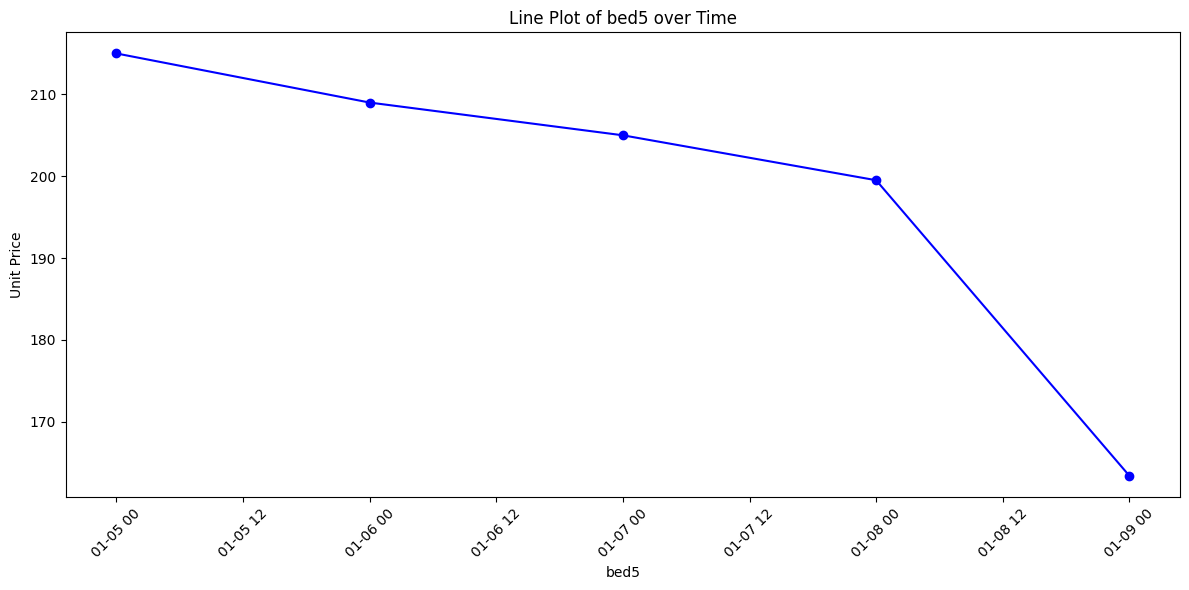

In [ ]:
# Convert the 'month_year' column to datetime format if it isn't already
df['month_year_time'] = pd.to_datetime(df['month_year'])

# Plot with 'month_year' on the x-axis and a numerical column on the y-axis (replace 'numerical_column' with your column name)
for i in df['product_id'].unique():
    plt.figure(figsize=(12, 6))
    plt.plot(df[df['product_id']==i]['month_year_time'], df[df['product_id']==i]['unit_price'], marker='o', linestyle='-', color='b')
    plt.xlabel(i)
    plt.ylabel('Unit Price')
    plt.title(f'Line Plot of {i} over Time')
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df.drop(columns=['month_year_time'],inplace=True)

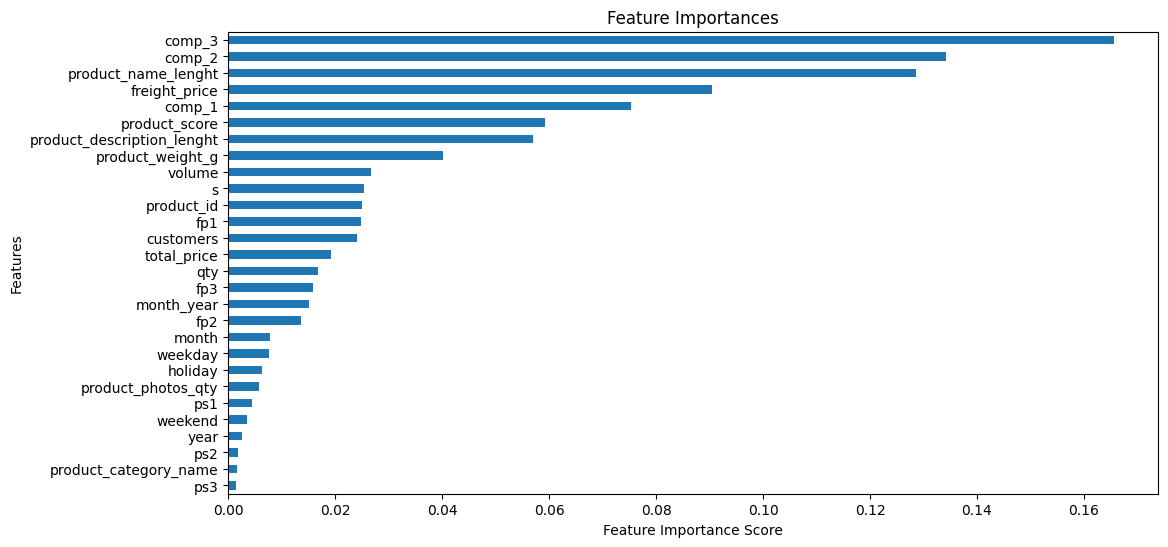

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Initialize and train the Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_scaled, y_train)

# Feature Importance Plot
fig, ax = plt.subplots(figsize=(12, 6))

# Create a Series for feature importances
feat_imp = pd.Series(
    rf_reg.feature_importances_,
    index=X_train_scaled.columns
).sort_values(ascending=True)

# Plot feature importances
feat_imp.plot(kind='barh', title='Feature Importances')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

In [ ]:
!pip install lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.0 MB/s eta 0:00:00


In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

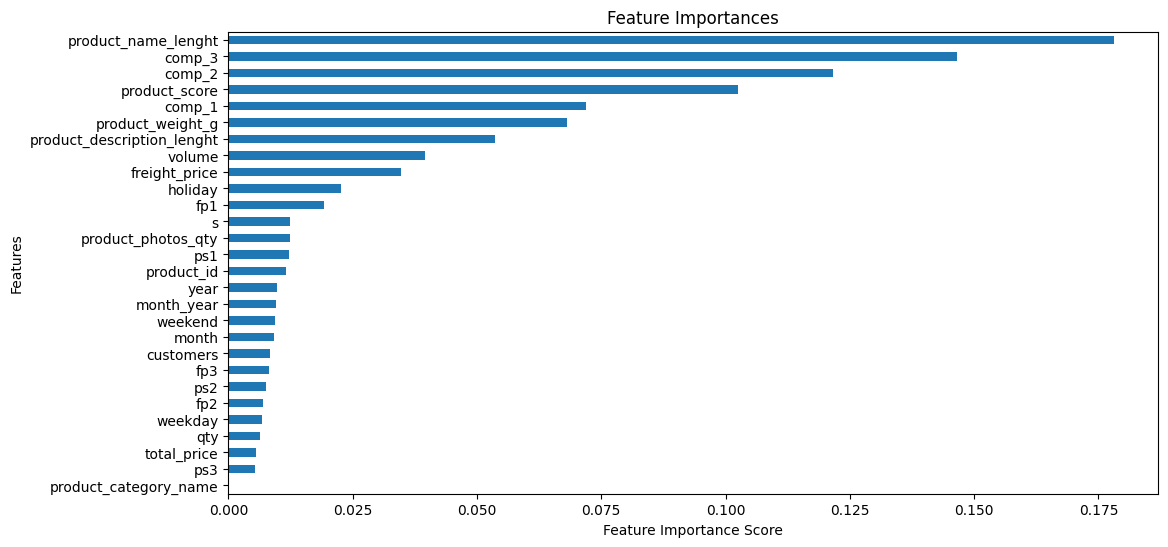

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assume data is already loaded into a DataFrame called data
# Replace 'unit_price' with your target variable, if needed

# Define features and target variable
X = df.drop(columns=['unit_price','lag_price'])
y = df['unit_price']

# Label encode categorical features
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le  # Store encoder to potentially reverse-transform later if needed


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Initialize and train the XGBoost Regressor
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train_scaled, y_train)

# Feature Importance Plot
fig, ax = plt.subplots(figsize=(12, 6))

# Create a Series for feature importances
feat_imp = pd.Series(
    xgb_reg.feature_importances_,
    index=X_train_scaled.columns
).sort_values(ascending=True)

# Plot feature importances
feat_imp.plot(kind='barh', title='Feature Importances')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

In [ ]:
X_train

product_id  product_category_name  month_year  qty  total_price  \
1840          22                      4           1   13      1196.00   
2115           9                      1           4    7      2449.30   
4437          32                      5          14   16      5280.00   
1146          31                      5          18    7       579.75   
2486          15                      3           9    8       759.92   
...          ...                    ...         ...  ...          ...   
4426           7                      1           1    6       707.40   
466           52                      8          18   32      3935.68   
3092          47                      8           6   17      1529.83   
3772          44                      6          10    7       770.00   
860           53                      8           6   22      1911.80   

      freight_price  product_name_lenght  product_description_lenght  \
1840          17.95                   49                         829   
2115          13.71                   45                         236   
4437          19.89                   56                         348   
1146          16.81                   57                         366   
2486          15.70                   40                        1456   
...             ...                  ...                         ...   
4426          17.33                   33                         256   
466           17.86                   35                         591   
3092          23.82                   58                        3006   
3772          44.63                   50                        1257   
860           11.38                   58                        3006   

      product_photos_qty  product_weight_g  product_score  customers  weekday  \
1840                   1               850           3.70         62       23   
2115                   1               173           4.00        112       21   
4437                   2              1550           4.10        131       21   
1146                   2              1650           4.10        127       23   
2486                   1              2425           3.80         17       20   
...                  ...               ...            ...        ...      ...   
4426                   1               180           3.50         15       23   
466                    3               444           4.00        127       23   
3092                   2              1000           4.20        126       20   
3772                   1               700           4.10        111       21   
860                    1              1000           4.20         62       20   

      weekend  holiday  month  year     s  volume  comp_1  ps1   fp1  comp_2  \
1840        8        2      1  2018 50.00   10000   38.40 4.10 17.95   38.40   
2115       10        1     12  2017 10.94    2808  119.99 4.20 38.57  149.90   
4437        9        0      6  2018 10.13   19800   53.42 4.10 19.89   53.71   
1146        8        1      8  2018  9.26   19800   52.41 4.10 18.07   53.65   
2486       10        2      4  2017 10.66   16530   99.99 4.20 18.98  129.99   
...       ...      ...    ...   ...   ...     ...     ...  ...   ...     ...   
4426        8        2      1  2018  7.32    2210  119.99 4.20 53.63  149.90   
466         8        1      8  2018 20.51    4480  118.36 4.20 14.04  105.00   
3092        8        2      2  2018 15.04    7632  103.79 4.20 19.21  105.00   
3772        9        1      4  2018 10.66    5700   23.99 4.10 11.29   83.74   
860         8        2      2  2018  8.87    7632  133.00 4.20  0.10  108.00   

      ps2   fp2  comp_3  ps3   fp3  
1840 3.70 17.95   38.40 3.70 17.95  
2115 4.00 13.71   77.90 3.50 25.25  
4437 4.20 23.25   53.06 4.10 22.88  
1146 4.20 17.60   53.79 4.10 16.81  
2486 4.30 19.02   29.50 4.40 15.70  
...   ...   ...     ...  ...   ...  
4426 4.30 27.63   77.90 3.50 17.33  
466  4.00 17.86  155.00 3.80 19.53

In [ ]:
df

product_id product_category_name month_year  qty  total_price  \
0     furniture3       furniture_decor   1/4/2017    3       539.97   
1      consoles1        consoles_games   1/4/2017    1       349.90   
2     perfumery1             perfumery   1/8/2017    1       134.99   
3     perfumery1             perfumery   1/4/2017    1       349.90   
4        garden3          garden_tools   1/7/2018    2        95.80   
...          ...                   ...        ...  ...          ...   
4995     garden7          garden_tools   1/3/2018   14       493.40   
4996    watches4         watches_gifts   1/3/2018    4       470.80   
4997        bed3        bed_bath_table   1/7/2018    8       840.00   
4998     garden4          garden_tools   1/5/2018   33      1723.08   
4999     garden7          garden_tools   1/3/2017    8      1039.92   

      freight_price  unit_price  product_name_lenght  \
0             17.95       38.40                   49   
1             13.65       24.50                   49   
2             12.21       56.99                   54   
3             13.66       56.99                   54   
4             15.98       59.90                   59   
...             ...         ...                  ...   
4995          10.75       53.42                   56   
4996           2.18      185.96                   33   
4997          16.78       89.90                   54   
4998          16.08       51.40                   59   
4999          28.37       53.79                   56   

      product_description_lenght  product_photos_qty  product_weight_g  \
0                            829                   1               850   
1                            100                   4               150   
2                           1536                   2               250   
3                           1536                   2               250   
4                            341                   2              1850   
...                          ...                 ...               ...   
4995                         348                   2              1550   
4996                         523                   2               584   
4997                         245                   1              1383   
4998                         341                   1              1750   
4999                         348                   2              1550   

      product_score  customers  weekday  weekend  holiday  month  year     s  \
0              3.70         17       20       10        2      4  2017 10.80   
1              4.20         23       20       10        2      4  2017  4.59   
2              4.30         39       23        8        1      8  2017  1.43   
3              4.30         23       20       10        2      4  2017  4.59   
4              4.30         26       22        9        1      7  2018  3.45   
...             ...        ...      ...      ...      ...    ...   ...   ...   
4995           4.10         83       22        9        1      3  2018 31.82   
4996           4.20         18       22        9        1      3  2018  4.88   
4997           3.90        122       22        9        1      7  2018  4.02   
4998           4.20        159       23        8        3      5  2018 21.29   
4999           4.10         22       23        8        1      3  2017  9.85   

      volume  comp_1  ps1   fp1  comp_2  ps2   fp2  comp_3  ps3   fp3  \
0      10000   38.40 3.70 17.95   38.40 3.70 17.95   38.40 3.70 17.95   
1       2304   24.50 4.20 13.65   24.50 3.90 13.65   24.50 4.20 13.65   
2       3360   56.99 4.30 12.21  142.50 4.40 14.04   56.99 4.30 12.21   
3       3360   56.99 4.30 13.66  117.90 4.40 21.65   56.99 4.30 13.66   
4      32560   59.90 4.10 17.67   59.90 4.20 16.26   59.90 4.10 15.98   
...      ...     ...  ...   ...     ...  ...   ...     ...  ...   ...   
4995   19800   53.42 4.10 10.75   53.71 4.20 13.51   53.06 4.10 12.98   
4996    2288  149.00 4.20  2.18  108.00 4.20 1

In [ ]:
# Define features and target variable
X = df.drop(columns=['unit_price','lag_price','month_year'])
y = df['unit_price']

# Label encode categorical features
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le  # Store encoder to potentially reverse-transform later if needed


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

 98%|█████████▊| 41/42 [00:18<00:00,  1.84it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001423 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1958
[LightGBM] [Info] Number of data points in the train set: 3500, number of used features: 27
[LightGBM] [Info] Start training from score 98.438378


100%|██████████| 42/42 [00:19<00:00,  2.19it/s]

                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
ExtraTreesRegressor                          0.76       0.76  35.71   
GradientBoostingRegressor                    0.75       0.76  36.09   
RandomForestRegressor                        0.75       0.75  36.72   
HistGradientBoostingRegressor                0.74       0.75  36.86   
LGBMRegressor                                0.73       0.74  37.50   
BaggingRegressor                             0.71       0.71  39.27   
XGBRegressor                                 0.71       0.71  39.35   
MLPRegressor                                 0.62       0.63  44.94   
AdaBoostRegressor                            0.57       0.58  47.51   
KNeighborsRegressor                          0.56       0.57  48.20   
ExtraTreeRegressor                           0.48       0.48  52.78   
DecisionTreeRegressor                        0.44       0.45  54.71   
Transf

In [ ]:
def evaluate_models(X, y, test_size=0.3, random_state=42):
    """
    Splits the data, fits LazyRegressor on the training set, and evaluates on the test set.

    Parameters:
        X (pd.DataFrame or np.ndarray): Features dataset.
        y (pd.Series or np.ndarray): Target variable.
        test_size (float): Proportion of the dataset to include in the test split.
        random_state (int): Random seed for reproducibility.

    Returns:
        models (pd.DataFrame): Model performance metrics from LazyClassifier.
    """
    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize LazyClassifier
    reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

    # Fit models and get predictions
    models, predictions = reg.fit(X_train, X_test, y_train, y_test)

    return models

In [ ]:
evaluate_models(X,y)

 98%|█████████▊| 41/42 [00:25<00:00,  1.32it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000559 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1958
[LightGBM] [Info] Number of data points in the train set: 3500, number of used features: 27
[LightGBM] [Info] Start training from score 98.438378


100%|██████████| 42/42 [00:25<00:00,  1.63it/s]


Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
ExtraTreesRegressor                          0.76       0.76  35.71   
GradientBoostingRegressor                    0.75       0.76  36.09   
RandomForestRegressor                        0.75       0.75  36.72   
HistGradientBoostingRegressor                0.74       0.75  36.86   
LGBMRegressor                                0.73       0.74  37.50   
BaggingRegressor                             0.71       0.71  39.27   
XGBRegressor                                 0.71       0.71  39.35   
MLPRegressor                                 0.62       0.63  44.94   
AdaBoostRegressor                            0.57       0.58  47.51   
KNeighborsRegressor                          0.56       0.57  48.20   
ExtraTreeRegressor                           0.48       0.48  52.78   
DecisionTreeRegressor                        0.44       0.45  54.71   
LinearRegression                             0.40       0.41  56.23   
TransformedTargetRegressor                   0.40       0.41  56.23   
Ridge                                        0.40       0.41  56.24   
RidgeCV                                      0.40       0.41  56.24   
BayesianRidge                                0.40       0.41  56.27   
ElasticNetCV                                 0.40       0.41  56.34   
SGDRegressor                                 0.40       0.41  56.38   
LassoLarsCV                                  0.40       0.41  56.41   
LassoCV                                      0.40       0.41  56.42   
LassoLarsIC                                  0.40       0.41  56.42   
Lasso                                        0.39       0.40  56.95   
LassoLars                                    0.39       0.40  56.95   
Lars                                         0.39       0.40  57.00   
OrthogonalMatchingPursuitCV                  0.36       0.38  58.10   
ElasticNet                                   0.36       0.37  58.48   
PoissonRegressor                             0.35       0.37  58.56   
LarsCV                                       0.35       0.36  58.66   
HuberRegressor                               0.33       0.34  59.76   
TweedieRegressor                             0.33       0.34  59.85   
GammaRegressor                               0.32       0.34  59.90   
LinearSVR                                    0.30       0.31  60.93   
OrthogonalMatchingPursuit                    0.29       0.30  61.38   
PassiveAggressiveRegressor                   0.25       0.26  63.25   
NuSVR                                        0.23       0.24  64.08   
SVR                                          0.22       0.23  64.33   
RANSACRegressor                              0.15       0.16  67.30   
DummyRegressor                              -0.02      -0.00  73.58   
QuantileRegressor                           -0.07      -0.05  75.36   
GaussianProcessRegressor                    -0.83      -0.80  98.52   
KernelRidge                                 -1.46      -1.42 114.29   

                               Time Taken  
Model                                      
ExtraTreesRegressor                  1.82  
GradientBoostingRegressor            1.19  
RandomForestRegressor                3.97  
HistGradientBoostingRegressor        0.45  
LGBMRegressor                        0.34  
BaggingRegressor                     0.42  
XGBRegressor                         1.27  
MLPRegressor                         6.13  
AdaBoostRegressor                    0.12  
KNeighborsRegressor                  0.08  
ExtraTreeRegressor                   0.05  
DecisionTreeRegressor                0.12  
LinearRegression                     0.12  
TransformedTargetRegressor           0.16  
Ridge                                0.02  
RidgeCV                              0.04  
BayesianRidge                        0.04  
ElasticNetCV                         0.18  
SGDRegressor              

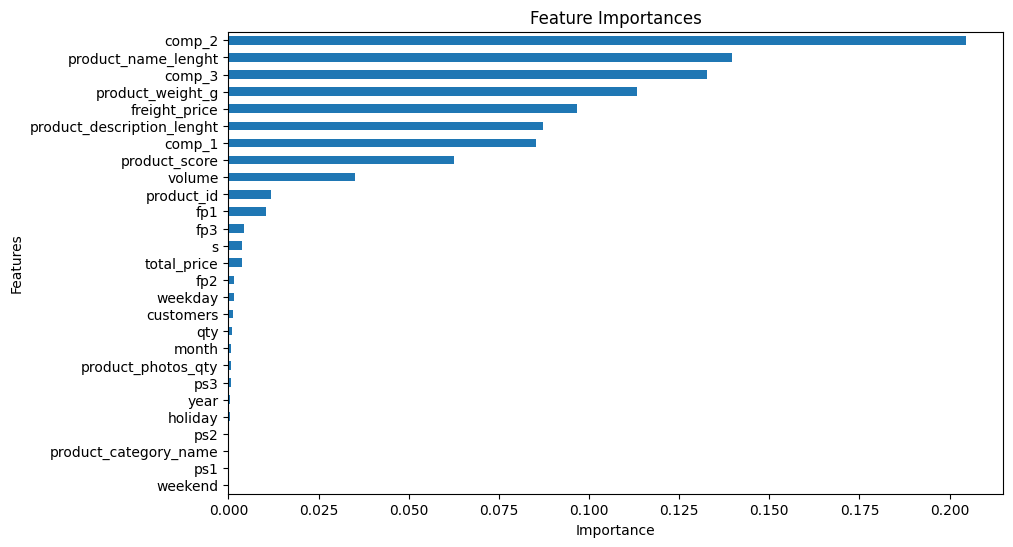

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Assuming X_train and y_train are already defined
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)

# Plot feature importances
feature_importances.sort_values(ascending=True).plot(kind='barh', figsize=(10, 6), title='Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [ ]:
# Sort features by importance
sorted_features = feature_importances.sort_values(ascending=False)
print("Feature Importances:\n", sorted_features)

Feature Importances:
 comp_2                       0.20
product_name_lenght          0.14
comp_3                       0.13
product_weight_g             0.11
freight_price                0.10
product_description_lenght   0.09
comp_1                       0.09
product_score                0.06
volume                       0.04
product_id                   0.01
fp1                          0.01
fp3                          0.00
s                            0.00
total_price                  0.00
fp2                          0.00
weekday                      0.00
customers                    0.00
qty                          0.00
month                        0.00
product_photos_qty           0.00
ps3                          0.00
year                         0.00
holiday                      0.00
ps2                          0.00
product_category_name        0.00
weekend                      0.00
ps1                          0.00
dtype: float64


In [ ]:
threshold = 0.01  # Set a threshold for importance
important_features = sorted_features[sorted_features > threshold].index

In [ ]:
important_features

Index(['comp_2', 'product_name_lenght', 'comp_3', 'product_weight_g',
       'freight_price', 'product_description_lenght', 'comp_1',
       'product_score', 'volume', 'product_id', 'fp1'],
      dtype='object')

In [ ]:
X,y = df[['comp_2', 'product_name_lenght', 'comp_3', 'product_weight_g',
       'freight_price', 'product_description_lenght', 'comp_1',
       'product_score', 'volume', 'product_id', 'fp1']],df['unit_price']

In [ ]:
X

comp_2  product_name_lenght  comp_3  product_weight_g  freight_price  \
0      38.40                   49   38.40               850          17.95   
1      24.50                   49   24.50               150          13.65   
2     142.50                   54   56.99               250          12.21   
3     117.90                   54   56.99               250          13.66   
4      59.90                   59   59.90              1850          15.98   
...      ...                  ...     ...               ...            ...   
4995   53.71                   56   53.06              1550          10.75   
4996  108.00                   33  185.96               584           2.18   
4997  205.00                   54   45.95              1383          16.78   
4998   50.90                   59   50.36              1750          16.08   
4999   53.65                   56   53.79              1550          28.37   

      product_description_lenght  comp_1  product_score  volume  product_id  \
0                            829   38.40           3.70   10000  furniture3   
1                            100   24.50           4.20    2304   consoles1   
2                           1536   56.99           4.30    3360  perfumery1   
3                           1536   56.99           4.30    3360  perfumery1   
4                            341   59.90           4.30   32560     garden3   
...                          ...     ...            ...     ...         ...   
4995                         348   53.42           4.10   19800     garden7   
4996                         523  149.00           4.20    2288    watches4   
4997                         245   89.90           3.90   20000        bed3   
4998                         341   50.55           4.20   32560     garden4   
4999                         348   52.41           4.10   19800     garden7   

       fp1  
0    17.95  
1    13.65  
2    12.21  
3    13.66  
4    17.67  
...    ...  
4995 10.75  
4996  2.18  
4997 16.78  
4998 17.07  
4999 28.37  

[5000 rows x 11 columns]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   comp_2                      5000 non-null   float64
 1   product_name_lenght         5000 non-null   int64  
 2   comp_3                      5000 non-null   float64
 3   product_weight_g            5000 non-null   int64  
 4   freight_price               5000 non-null   float64
 5   product_description_lenght  5000 non-null   int64  
 6   comp_1                      5000 non-null   float64
 7   product_score               5000 non-null   float64
 8   volume                      5000 non-null   int64  
 9   product_id                  5000 non-null   object 
 10  fp1                         5000 non-null   float64
dtypes: float64(6), int64(4), object(1)
memory usage: 429.8+ KB


In [ ]:
X.select_dtypes(include=['object']).columns

Index(['product_id'], dtype='object')

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Label encode categorical features
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le  # Store encoder to potentially reverse-transform later if needed

In [ ]:
label_encoders

{'product_id': LabelEncoder()}

In [ ]:
# Extract label encoding mappings for 'product_id'
product_id_mapping = {original: encoded for encoded, original in enumerate(label_encoders['product_id'].classes_)}

# Print the mapping
print(product_id_mapping)

{'bed1': 0, 'bed2': 1, 'bed3': 2, 'bed4': 3, 'bed5': 4, 'bed7': 5, 'computers1': 6, 'computers2': 7, 'computers3': 8, 'computers4': 9, 'computers5': 10, 'computers6': 11, 'computers8': 12, 'consoles1': 13, 'consoles2': 14, 'cool1': 15, 'cool2': 16, 'cool3': 17, 'cool4': 18, 'cool5': 19, 'furniture1': 20, 'furniture2': 21, 'furniture3': 22, 'furniture4': 23, 'furniture7': 24, 'garden1': 25, 'garden10': 26, 'garden2': 27, 'garden3': 28, 'garden4': 29, 'garden5': 30, 'garden6': 31, 'garden7': 32, 'garden8': 33, 'garden9': 34, 'health1': 35, 'health10': 36, 'health2': 37, 'health3': 38, 'health4': 39, 'health5': 40, 'health6': 41, 'health7': 42, 'health8': 43, 'health9': 44, 'perfumery1': 45, 'perfumery2': 46, 'watches1': 47, 'watches2': 48, 'watches3': 49, 'watches4': 50, 'watches5': 51, 'watches6': 52, 'watches7': 53, 'watches8': 54}


In [ ]:


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model
gbr = GradientBoostingRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [200, 300, 400],         # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],      # Shrinkage rate
    'max_depth': [5, 7, 9],                 # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],        # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4],          # Minimum samples in a leaf node
    'subsample': [0.8, 1.0]                 # Fraction of samples for training
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Use negative MSE for regression
    cv=5,                              # 5-fold cross-validation
    verbose=1,
    n_jobs=-1                          # Use all available cores
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_cv_score = -grid_search.best_score_  # Convert negative MSE to positive MSE

# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Metrics
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

# Print results
print("Best Parameters:", best_params)
print("Best Cross-Validation MSE:", best_cv_score)
print("Test MSE:", test_mse)
print("Test R^2:", test_r2)


Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 400, 'subsample': 0.8}
Best Cross-Validation MSE: 1295.6875521358681
Test MSE: 1307.5205155183205
Test R^2: 0.7580665541459757


In [ ]:
label_encoders

{}

In [ ]:
best_model.score(X_train,y_train)

0.7800828170643791

In [ ]:
best_model.score(X_test, y_test)

0.7580665541459757

In [ ]:
import pickle
# After GridSearchCV is completed:

# 1. Extract the best model
best_model = grid_search.best_estimator_

# 2. Extract the best parameters
best_params = grid_search.best_params_

# 3. Extract the best score
best_score = grid_search.best_score_

# Save the best model, parameters, and score to a pickle file
with open('grid_search_results.pkl', 'wb') as file:
    pickle.dump((best_model, best_params, best_score), file)

In [ ]:
import pandas as pd

# Example of creating a pivot table
pivot_table = df.pivot_table(
    values=None,  # Value to aggregate (can be set to None if not aggregating)
    index=['product_category_name','product_id'],  # Rows
    columns=None,  # No columns in this case, just index grouping
    aggfunc='mode',  # Aggregation function, e.g., 'count' or 'sum'
    fill_value=0  # Replace NaN with 0 if there are missing values
)

# Sort the resulting pivot table by the product_id count (descending)
pivot_table = pivot_table.sort_values(by='product_id', ascending=False)

print(pivot_table)


AttributeError: 'mode' is not a valid function for 'DataFrameGroupBy' object

In [ ]:
# Group by 'product_category_name' and collect unique 'product_id' as a set
category_to_unique_products = (
    df.groupby('product_category_name')['product_id']
    .apply(lambda x: set(x))  # Use a set to ensure uniqueness
    .to_dict()
)

# Print the resulting dictionary
print(category_to_unique_products)


{'bed_bath_table': {'bed1', 'bed4', 'bed5', 'bed3', 'bed2', 'bed7'}, 'computers_accessories': {'computers1', 'computers5', 'computers4', 'computers8', 'computers3', 'computers2', 'computers6'}, 'consoles_games': {'consoles2', 'consoles1'}, 'cool_stuff': {'cool4', 'cool3', 'cool2', 'cool1', 'cool5'}, 'furniture_decor': {'furniture2', 'furniture4', 'furniture1', 'furniture7', 'furniture3'}, 'garden_tools': {'garden10', 'garden4', 'garden5', 'garden1', 'garden2', 'garden6', 'garden7', 'garden8', 'garden3', 'garden9'}, 'health_beauty': {'health6', 'health8', 'health2', 'health7', 'health3', 'health1', 'health10', 'health9', 'health4', 'health5'}, 'perfumery': {'perfumery1', 'perfumery2'}, 'watches_gifts': {'watches4', 'watches8', 'watches2', 'watches5', 'watches3', 'watches1', 'watches6', 'watches7'}}


In [ ]:
df['product_id'].unique()

array(['furniture3', 'consoles1', 'perfumery1', 'garden3', 'garden9',
       'garden10', 'garden8', 'garden7', 'furniture4', 'health9',
       'furniture1', 'health10', 'garden6', 'bed1', 'watches2', 'garden4',
       'health5', 'health7', 'cool2', 'computers1', 'watches6', 'health8',
       'watches3', 'computers2', 'watches4', 'watches1', 'health4',
       'cool1', 'cool5', 'garden5', 'bed4', 'computers3', 'bed3', 'cool4',
       'health2', 'watches7', 'health3', 'bed2', 'watches8', 'computers4',
       'garden1', 'health1', 'consoles2', 'garden2', 'computers6',
       'health6', 'furniture2', 'cool3', 'perfumery2', 'bed7',
       'computers5', 'watches5', 'bed5', 'furniture7', 'computers8'],
      dtype=object)

In [ ]:
label_encoders

{}